In [1]:
!pip install seaborn==0.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('/content/House_Rent_Train.csv')

In [4]:
df

id  type       locality  \
0      ff8081815733a243015733b2876600a6  BHK2            NaN   
1      ff8081815ee25e15015ee50004da2acd  BHK2      Bellandur   
2      ff80818163f29c9e0163f46770b873e7  BHK3  Thiruvanmiyur   
3      ff80818164b68a700164b74b1b247a1d  BHK1      Attiguppe   
4      ff80818163b1faf00163b4b9b8a163b1  BHK3      Kodihalli   
...                                 ...   ...            ...   
20550                                19   NaN            NaN   
20551                                20  BHK2            NaN   
20552                                21  BHK2            NaN   
20553                                22  BHK2            NaN   
20554                                23  BHK1            NaN   

        activation_date   latitude  longitude lease_type  gym  lift  \
0      21-04-2018 14:44  12.934471  77.634471     FAMILY    1     1   
1       9-10-2017 12:48  12.929557  77.672280     ANYONE    0     1   
2       12-6-2018 22:02  12.982870  80.262012     FAMILY    0     1   
3      20-07-2018 16:22  12.955991  77.531634     FAMILY    0     0   
4      31-05-2018 17:41  12.963903  77.649446     FAMILY    0     0   
...                 ...        ...        ...        ...  ...   ...   
20550               NaN        NaN        NaN        NaN    1     1   
20551               NaN        NaN        NaN        NaN    0     0   
20552               NaN        NaN        NaN        NaN    1     1   
20553               NaN        NaN        NaN        NaN    0     1   
20554               NaN        NaN        NaN        NaN    0     0   

       swimming_pool  ...  bathroom facing cup_board  floor  total_floor  \
0                  1  ...       2.0      E       2.0    6.0         12.0   
1                  0  ...       2.0     NE       2.0    3.0          4.0   
2                  0  ...       3.0      E       3.0    1.0          5.0   
3                  0  ...       1.0      E       1.0    1.0          2.0   
4                  0  ...       3.0      E       4.0    0.0          0.0   
...              ...  ...       ...    ...       ...    ...          ...   
20550              1  ...       NaN    NaN       NaN    NaN          NaN   
20551              0  ...       NaN    NaN       NaN    NaN          NaN   
20552              0  ...       NaN    NaN       NaN    NaN          NaN   
20553              0  ...       NaN    NaN       NaN    NaN          NaN   
20554              0  ...       NaN    NaN       NaN    NaN          NaN   

                                               amenities water_supply  \
0      {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...    CORP_BORE   
1      {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...  CORPORATION   
2      {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...    CORP_BORE   
3      {"LIFT":false,"GYM":false,"INTERNET":false,"AC...  CORPORATION   
4      {"LIFT":false,"GYM":false,"INTERNET":false,"AC...  CORPORATION   
...                                                  ...          ...   
20550                                                NaN          NaN   
20551                                                NaN          NaN   
20552                                                NaN          NaN   
20553                                                NaN          NaN   
20554                                                NaN          NaN   

       building_type  balconies     rent  
0                 AP        2.0  40000.0  
1                 AP        2.0  22000.0  
2                 AP        3.0  28000.0  
3                 IH        0.0   8000.0  
4                 IH        1.0  45000.0  
...              ...        ...      ...  
20550            NaN        NaN      NaN  
20551            NaN        NaN      NaN  
20552            NaN        NaN      NaN  
20553            NaN        NaN      NaN  
20554            NaN        NaN      NaN  

[20555 rows x 25 columns]

In [ ]:
df.dropcolumn(amenities)

In [5]:
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [8]:
df

id  type               locality  \
1      ff8081815ee25e15015ee50004da2acd  BHK2              Bellandur   
2      ff80818163f29c9e0163f46770b873e7  BHK3          Thiruvanmiyur   
3      ff80818164b68a700164b74b1b247a1d  BHK1              Attiguppe   
4      ff80818163b1faf00163b4b9b8a163b1  BHK3              Kodihalli   
5      ff8081815f48e4aa015f4dd1a9c6696b  BHK1   Seetharampalya,Hoodi   
...                                 ...   ...                    ...   
20524  ff80818159ded60e0159dfff948e5bcb  BHK1                 Ulsoor   
20528  ff8081815e73c2e2015e74ac10e91975  BHK2  Koramangala 4th Block   
20529  ff8081816073f28c016077bb8db47e4f  BHK2     Kumaraswamy Layout   
20530  ff8081814c6f8c9b014c6febae49016f  BHK2            Indiranagar   
20531  ff80818156fdef920156fe0eb0e807d0  BHK1      Malleshwaram West   

        activation_date   latitude  longitude lease_type  gym  lift  \
1       9-10-2017 12:48  12.929557  77.672280     ANYONE    0     1   
2       12-6-2018 22:02  12.982870  80.262012     FAMILY    0     1   
3      20-07-2018 16:22  12.955991  77.531634     FAMILY    0     0   
4      31-05-2018 17:41  12.963903  77.649446     FAMILY    0     0   
5      24-10-2017 18:29  12.986196  77.718314     FAMILY    1     1   
...                 ...        ...        ...        ...  ...   ...   
20524  11-10-2017 17:08  12.979762  77.615395     ANYONE    0     1   
20528  19-10-2017 20:31  12.931072  77.632361     ANYONE    0     0   
20529  21-12-2017 21:18  12.901800  77.566597     FAMILY    1     1   
20530  28-06-2018 21:58  12.965502  77.647694     FAMILY    0     1   
20531    8-7-2018 22:31  12.998645  77.574336     ANYONE    0     0   

       swimming_pool  ...  bathroom facing cup_board  floor  total_floor  \
1                  0  ...       2.0     NE       2.0    3.0          4.0   
2                  0  ...       3.0      E       3.0    1.0          5.0   
3                  0  ...       1.0      E       1.0    1.0          2.0   
4                  0  ...       3.0      E       4.0    0.0          0.0   
5                  1  ...       2.0      E       1.0    3.0          5.0   
...              ...  ...       ...    ...       ...    ...          ...   
20524              0  ...       2.0      E       1.0    1.0          4.0   
20528              0  ...       2.0      N       2.0    1.0          2.0   
20529              0  ...       2.0      W       2.0    5.0          5.0   
20530              0  ...       2.0      E       2.0    2.0          4.0   
20531              0  ...       1.0      E       1.0    1.0          1.0   

                                               amenities water_supply  \
1      {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...  CORPORATION   
2      {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...    CORP_BORE   
3      {"LIFT":false,"GYM":false,"INTERNET":false,"AC...  CORPORATION   
4      {"LIFT":false,"GYM":false,"INTERNET":false,"AC...  CORPORATION   
5      {"LIFT":true,"GYM":true,"INTERNET":false,"AC":...    CORP_BORE   
...                                                  ...          ...   
20524  {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...    CORP_BORE   
20528  {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...  CORPORATION   
20529  {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...     BOREWELL   
20530  {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...    CORP_BORE   
20531  {"LIFT":false,"GYM":false,"INTERNET":false,"AC...  CORPORATION   

       building_type  balconies     rent  
1                 AP        2.0  22000.0  
2                 AP        3.0  28000.0  
3                 IH        0.0   8000.0  
4                 IH        1.0  45000.0  
5                 AP        2.0  18000.0  
...              ...        ...      ...  
20524             AP        1.0  20000.0  
20528             IH        2.0  30000.0  
20529             AP        2.0  16000.0  
20530             AP        3.0  30000.0  
20531             IH        1.0   8500.0  

[20377 rows 

In [9]:
df.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
dtype: object

In [10]:
#correcting data type of columns date_sale and date_build
df['activation_date'] = pd.to_datetime(df['activation_date'])

<ipython-input-10-b56e8d70b709>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activation_date'] = pd.to_datetime(df['activation_date'])


In [11]:
df.dtypes

id                         object
type                       object
locality                   object
activation_date    datetime64[ns]
latitude                  float64
longitude                 float64
lease_type                 object
gym                         int64
lift                        int64
swimming_pool               int64
negotiable                  int64
furnishing                 object
parking                    object
property_size               int64
property_age              float64
bathroom                  float64
facing                     object
cup_board                 float64
floor                     float64
total_floor               float64
amenities                  object
water_supply               object
building_type              object
balconies                 float64
rent                      float64
dtype: object

In [12]:
# viewing how many columns in the dataframe fall in the object and the numeric data types
pd.DataFrame(df.dtypes.value_counts()).T

object  float64  int64  datetime64[ns]
0      10        9      5               1

In [13]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['gym', 'lift', 'swimming_pool', 'negotiable', 'property_size']

In [14]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['id',
 'type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'amenities',
 'water_supply',
 'building_type']

In [15]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "id" is divided into "20357" categories.
Column "type" is divided into "9" categories.
Column "locality" is divided into "1917" categories.
Column "lease_type" is divided into "4" categories.
Column "furnishing" is divided into "3" categories.
Column "parking" is divided into "4" categories.
Column "facing" is divided into "8" categories.
Column "amenities" is divided into "4958" categories.
Column "water_supply" is divided into "3" categories.
Column "building_type" is divided into "4" categories.


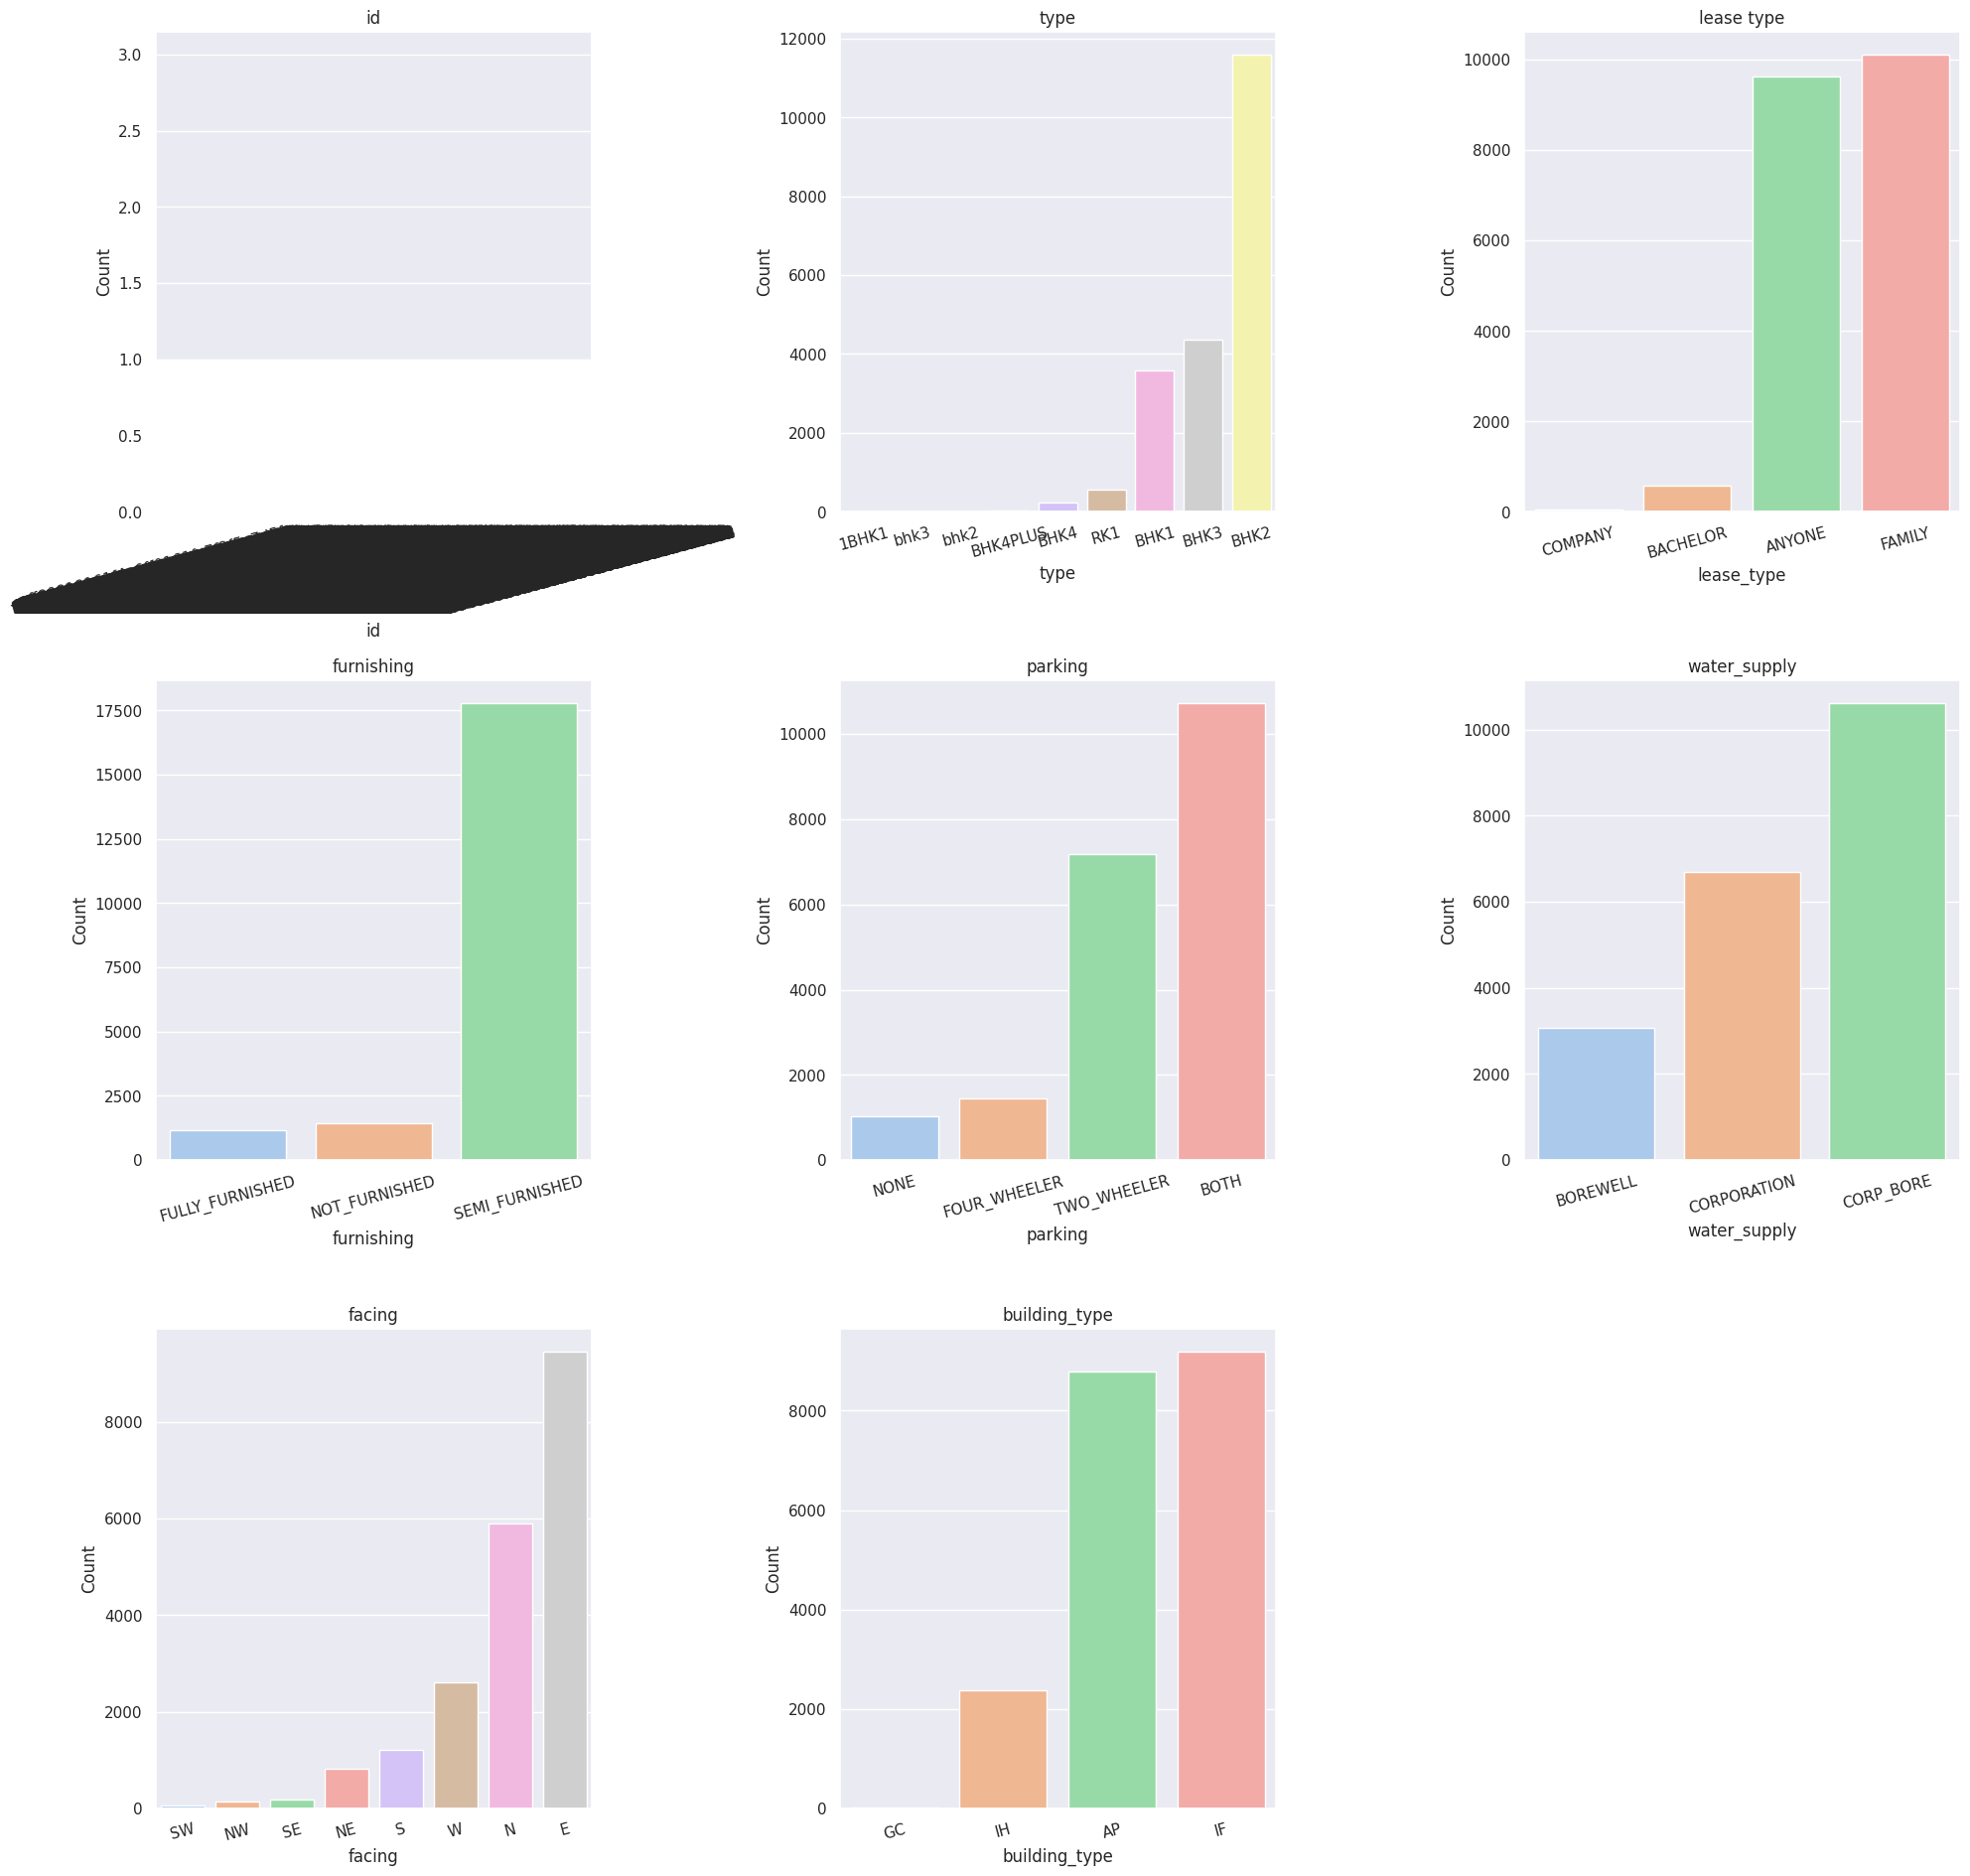

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid', palette='pastel')

plt.figure(figsize=(20, 25))

plt.subplot(431)
sns.countplot(x='id', data=df, order=df['id'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('id')
plt.ylabel('Count')
plt.title('id')

plt.subplot(432)
sns.countplot(x='type', data=df, order=df['type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('type')
plt.ylabel('Count')
plt.title('type')

plt.subplot(433)
sns.countplot(x='lease_type', data=df, order=df['lease_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('lease_type')
plt.ylabel('Count')
plt.title('lease type')

plt.subplot(434)
sns.countplot(x='furnishing', data=df, order=df['furnishing'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('furnishing')
plt.ylabel('Count')
plt.title('furnishing')

plt.subplot(435)
sns.countplot(x='parking', data=df, order=df['parking'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('parking')
plt.ylabel('Count')
plt.title('parking')

plt.subplot(436)
sns.countplot(x='water_supply', data=df, order=df['water_supply'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('water_supply')
plt.ylabel('Count')
plt.title('water_supply')

plt.subplot(437)
sns.countplot(x='facing', data=df, order=df['facing'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('facing')
plt.ylabel('Count')
plt.title('facing')

plt.subplot(438)
sns.countplot(x='building_type', data=df, order=df['building_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('building_type')
plt.ylabel('Count')
plt.title('building_type')

plt.tight_layout()
plt.show()


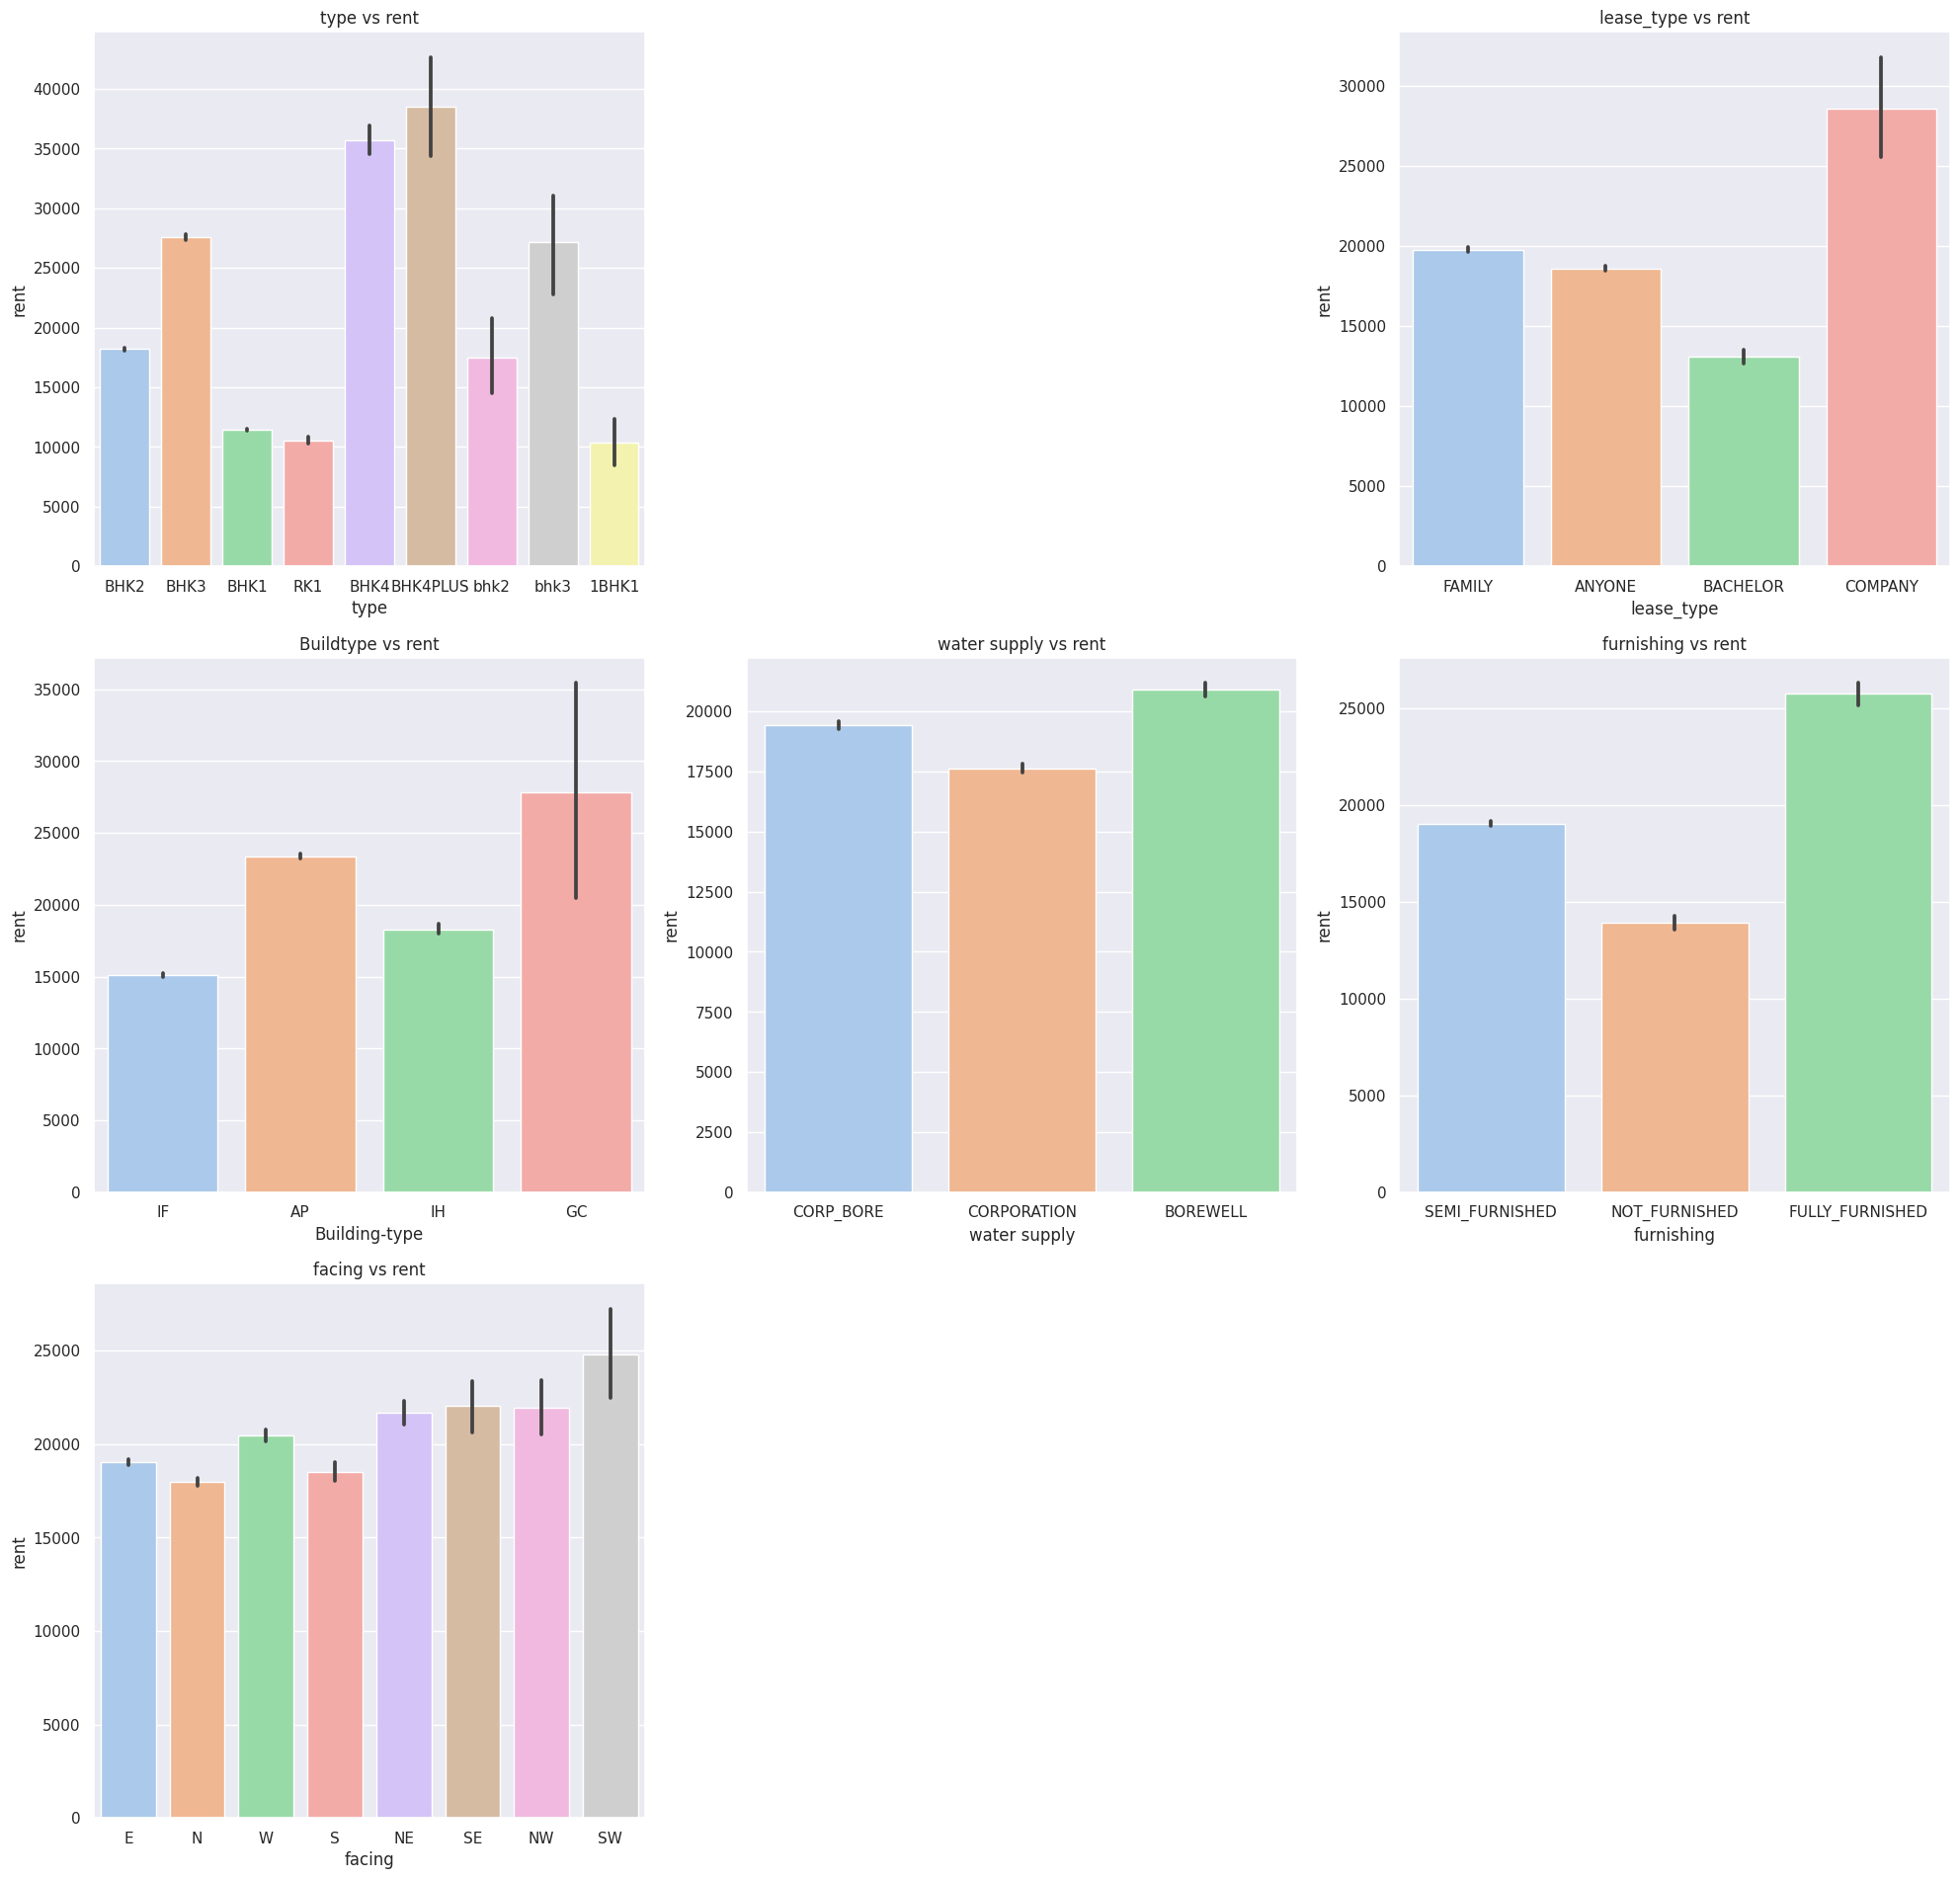

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Define the order for categorical variables
type_order = df['type'].value_counts().index
locality_order = df['locality'].value_counts().index
lease_type_order = df['lease_type'].value_counts().index
building_type_order = df['building_type'].value_counts().index
water_supply_order = df['water_supply'].value_counts().index
furnishing_order = df['furnishing'].value_counts().index
facing_order = df['facing'].value_counts().index

# Plotting for categorical columns
plt.figure(figsize=(20, 25))

plt.subplot(431)
sns.barplot(x=df['type'], y=df['rent'], order=type_order)
plt.xlabel('type')
plt.ylabel('rent')
plt.title('type vs rent')


plt.subplot(433)
sns.barplot(x=df['lease_type'], y=df['rent'], order=lease_type_order)
plt.xlabel('lease_type')
plt.ylabel('rent')
plt.title('lease_type vs rent')

plt.subplot(434)
sns.barplot(x=df['building_type'], y=df['rent'], order=building_type_order)
plt.xlabel('Building-type')
plt.ylabel('rent')
plt.title('Buildtype vs rent')

plt.subplot(435)
sns.barplot(x=df['water_supply'], y=df['rent'], order=water_supply_order)
plt.xlabel('water supply')
plt.ylabel('rent')
plt.title('water supply vs rent')

plt.subplot(436)
sns.barplot(x=df['furnishing'], y=df['rent'], order=furnishing_order)
plt.xlabel('furnishing')
plt.ylabel('rent')
plt.title('furnishing vs rent')

plt.subplot(437)
sns.barplot(x=df['facing'], y=df['rent'], order=facing_order)
plt.xlabel('facing')
plt.ylabel('rent')
plt.title('facing vs rent')

plt.tight_layout()
plt.show()


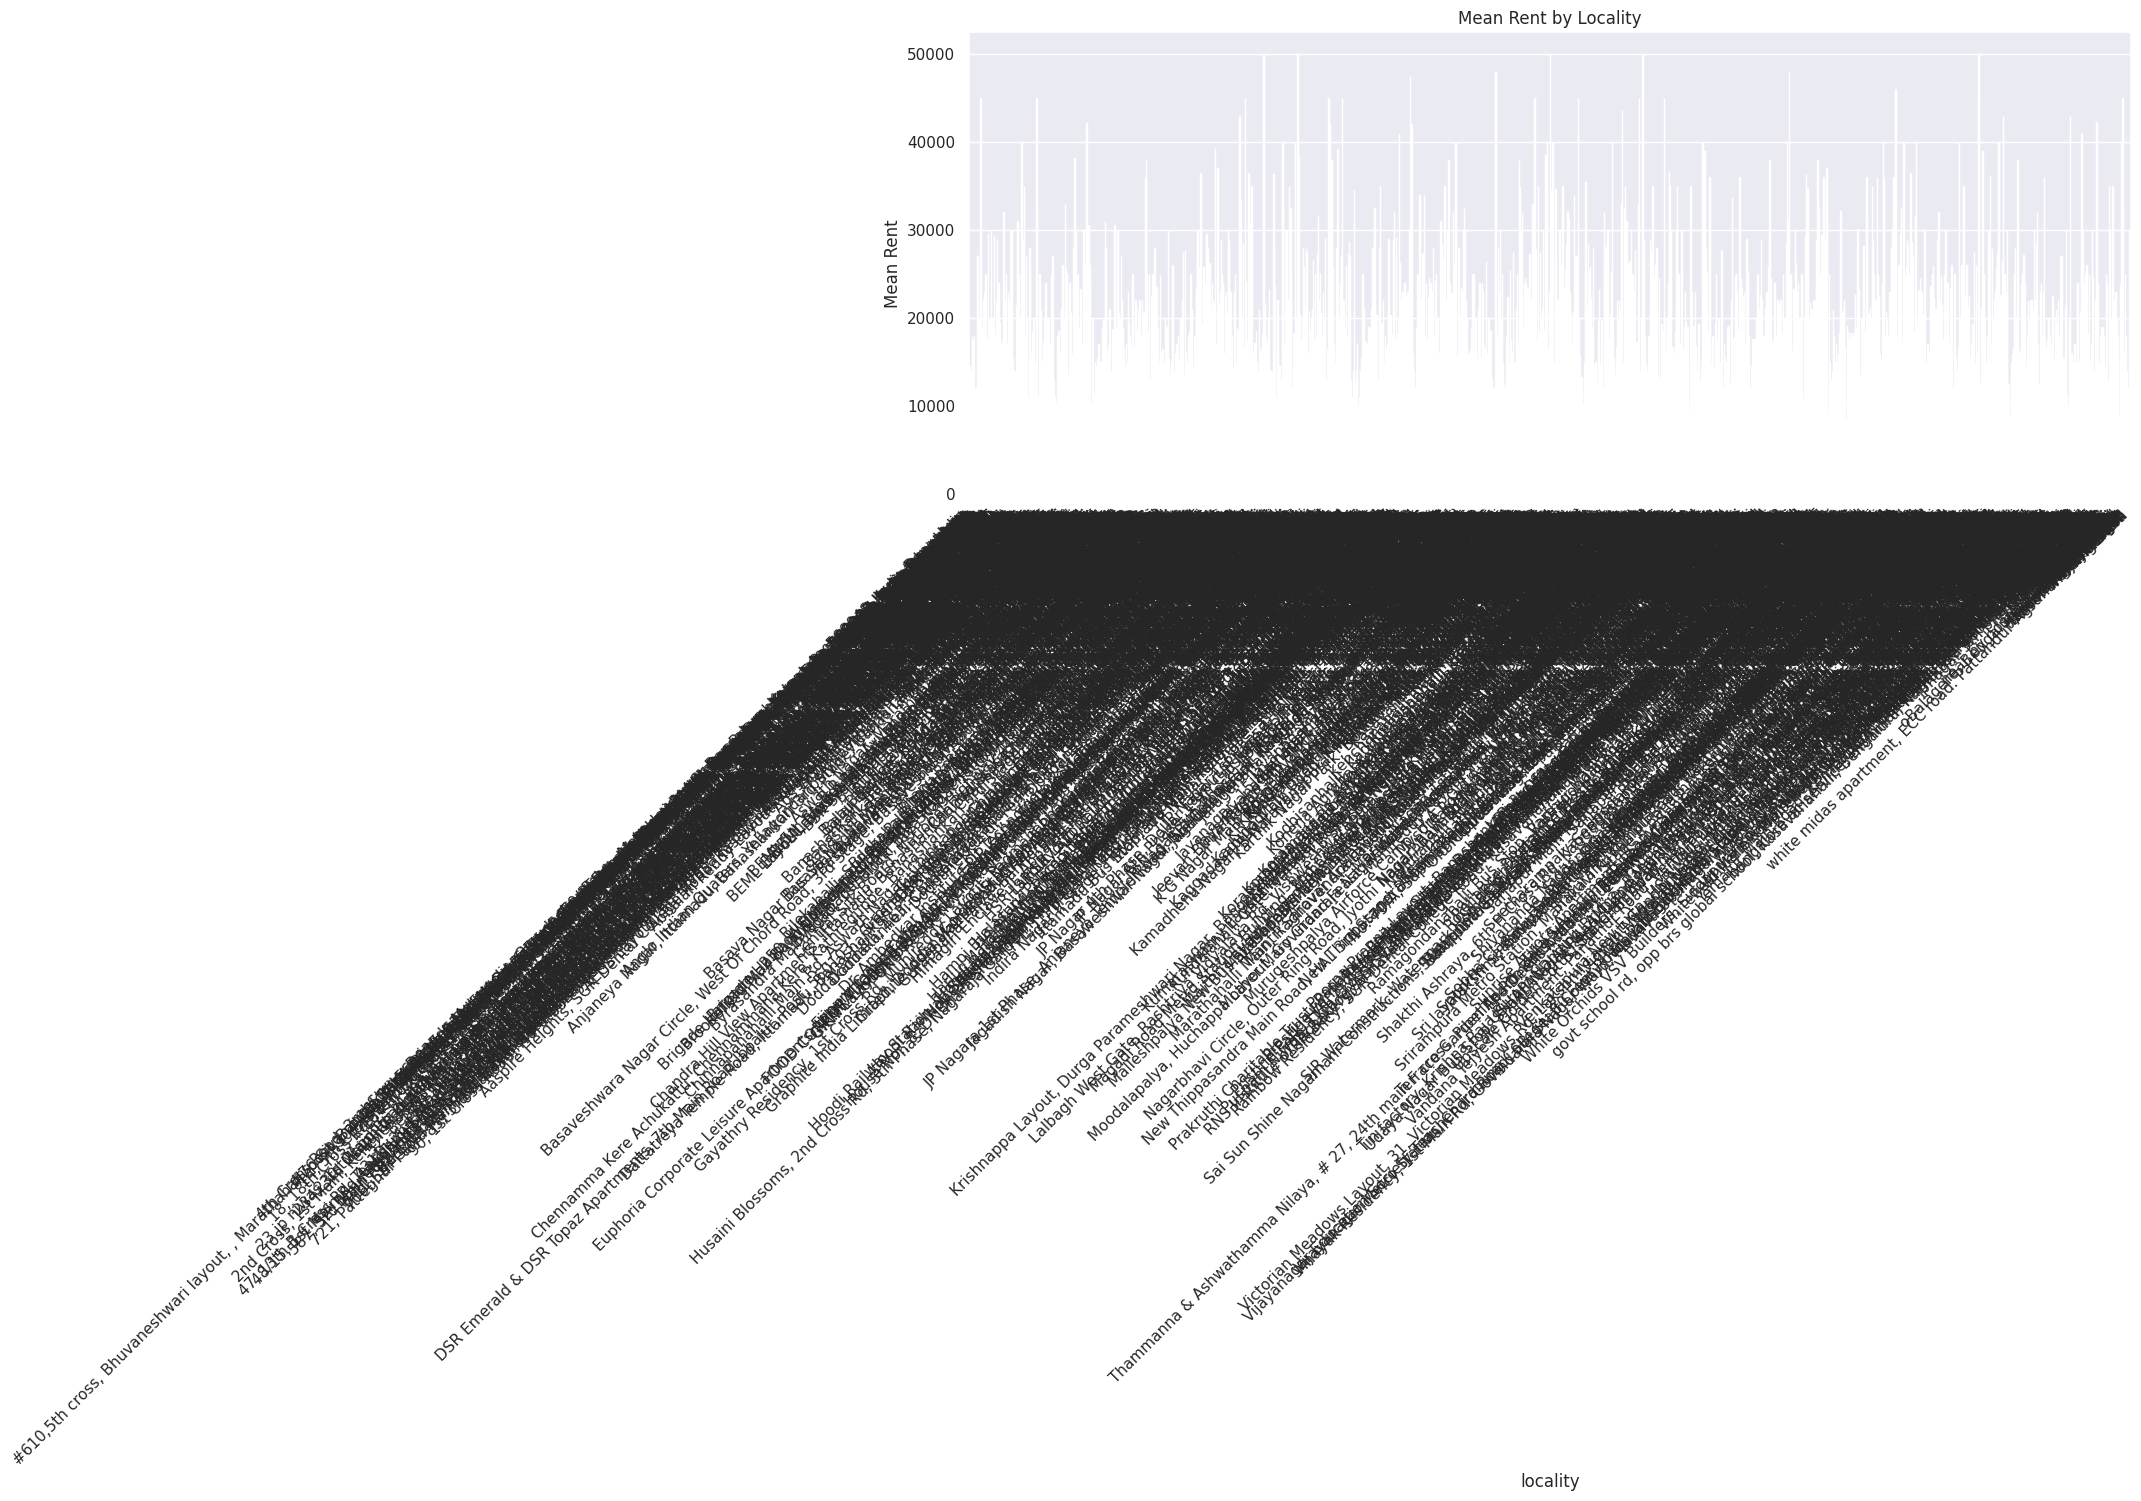

In [18]:
# Aggregating data by mean rent for each locality
aggregated_data = df.groupby('locality')['rent'].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x='locality', y='rent', data=aggregated_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('locality')
plt.ylabel('Mean Rent')
plt.title('Mean Rent by Locality')
plt.show()


In [ ]:
del df['amenities']

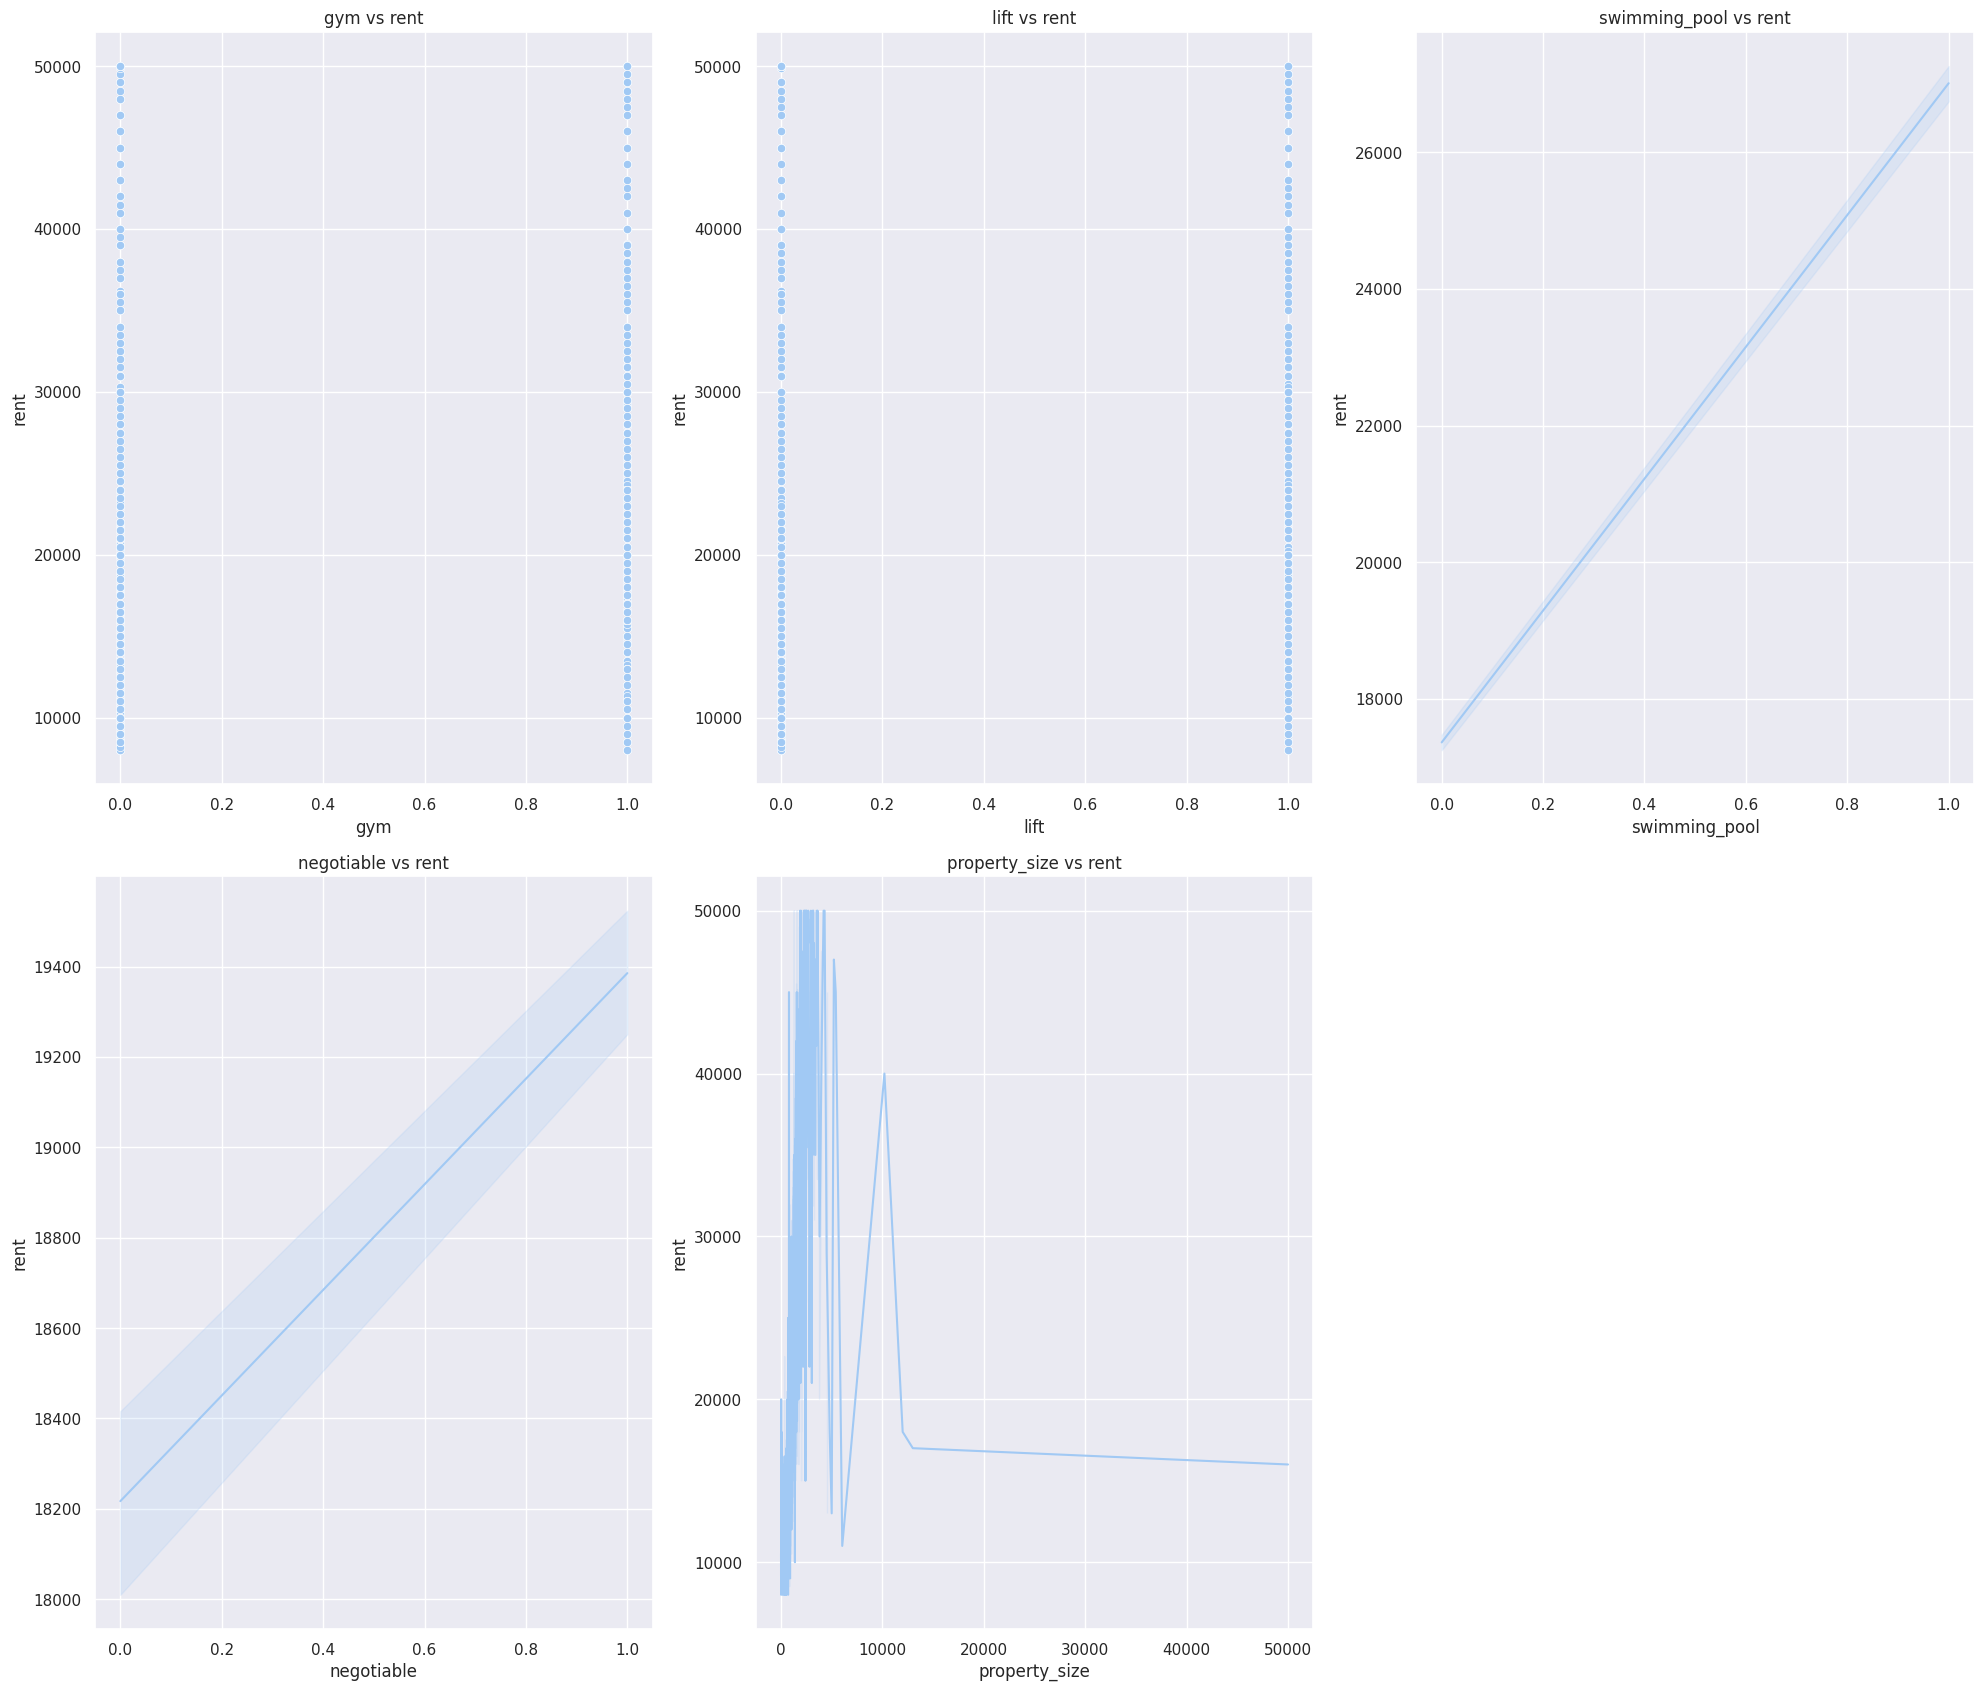

In [20]:
plt.figure(figsize=(20, 25))

plt.subplot(331)
sns.scatterplot(data=df, x='gym', y='rent')
plt.title('gym vs rent')

plt.subplot(332)
sns.scatterplot(data=df, x='lift', y='rent')
plt.title('lift vs rent')

plt.subplot(333)
sns.lineplot(data=df, x='swimming_pool', y='rent')
plt.title('swimming_pool vs rent')

plt.subplot(334)
sns.lineplot(data=df, x='negotiable', y='rent')
plt.title('negotiable vs rent')

plt.subplot(335)
sns.lineplot(data=df, x='property_size', y='rent')
plt.title('property_size vs rent')

plt.tight_layout()
plt.show()


In [21]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['id',
 'type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'amenities',
 'water_supply',
 'building_type']

In [22]:
df['type'].value_counts()

BHK2        11591
BHK3         4356
BHK1         3586
RK1           550
BHK4          232
BHK4PLUS       30
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64

In [23]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['id',
 'type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'amenities',
 'water_supply',
 'building_type']

In [24]:

df['type'] = df['type'].replace({'bhk2':'BHK2','bhk3':'BHK3','1BHK1':'BHK1','BHK4':'BHK4PLUS'})

<ipython-input-24-2dc9e6462d0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].replace({'bhk2':'BHK2','bhk3':'BHK3','1BHK1':'BHK1','BHK4':'BHK4PLUS'})


In [25]:
df['type'].value_counts()

BHK2        11607
BHK3         4368
BHK1         3590
RK1           550
BHK4PLUS      262
Name: type, dtype: int64

In [26]:
df['locality'].value_counts()

Whitefield                                                                                        900
HSR Layout                                                                                        682
Banashankari                                                                                      644
Marathahalli                                                                                      473
Bellandur                                                                                         433
                                                                                                 ... 
Simhadri layout                                                                                     1
Skylark Esta, Seetharampalya, Bengaluru, Karnataka, India                                           1
23d, 2nd A Cross Rd, Srinivasnagar, Banashankari, Bengaluru, Karnataka 560050, India,Bengaluru      1
Wilson Garden,                                                                    

In [27]:
df['lease_type'].value_counts()

FAMILY      10113
ANYONE       9622
BACHELOR      584
COMPANY        58
Name: lease_type, dtype: int64

In [28]:
df['facing'].value_counts()

E     9457
N     5888
W     2610
S     1211
NE     810
SE     193
NW     149
SW      59
Name: facing, dtype: int64

In [29]:
df['water_supply'].value_counts()

CORP_BORE      10617
CORPORATION     6695
BOREWELL        3065
Name: water_supply, dtype: int64

In [30]:
df['building_type'].value_counts()

IF    9194
AP    8790
IH    2376
GC      17
Name: building_type, dtype: int64

outlier

In [31]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['latitude',
 'longitude',
 'property_age',
 'bathroom',
 'cup_board',
 'floor',
 'total_floor',
 'balconies',
 'rent']

In [32]:
int64= [var for var in df.columns if df[var].dtype == 'int64']
int64

['gym', 'lift', 'swimming_pool', 'negotiable', 'property_size']

In [33]:
int32= [var for var in df.columns if df[var].dtype == 'int32']
int32

[]

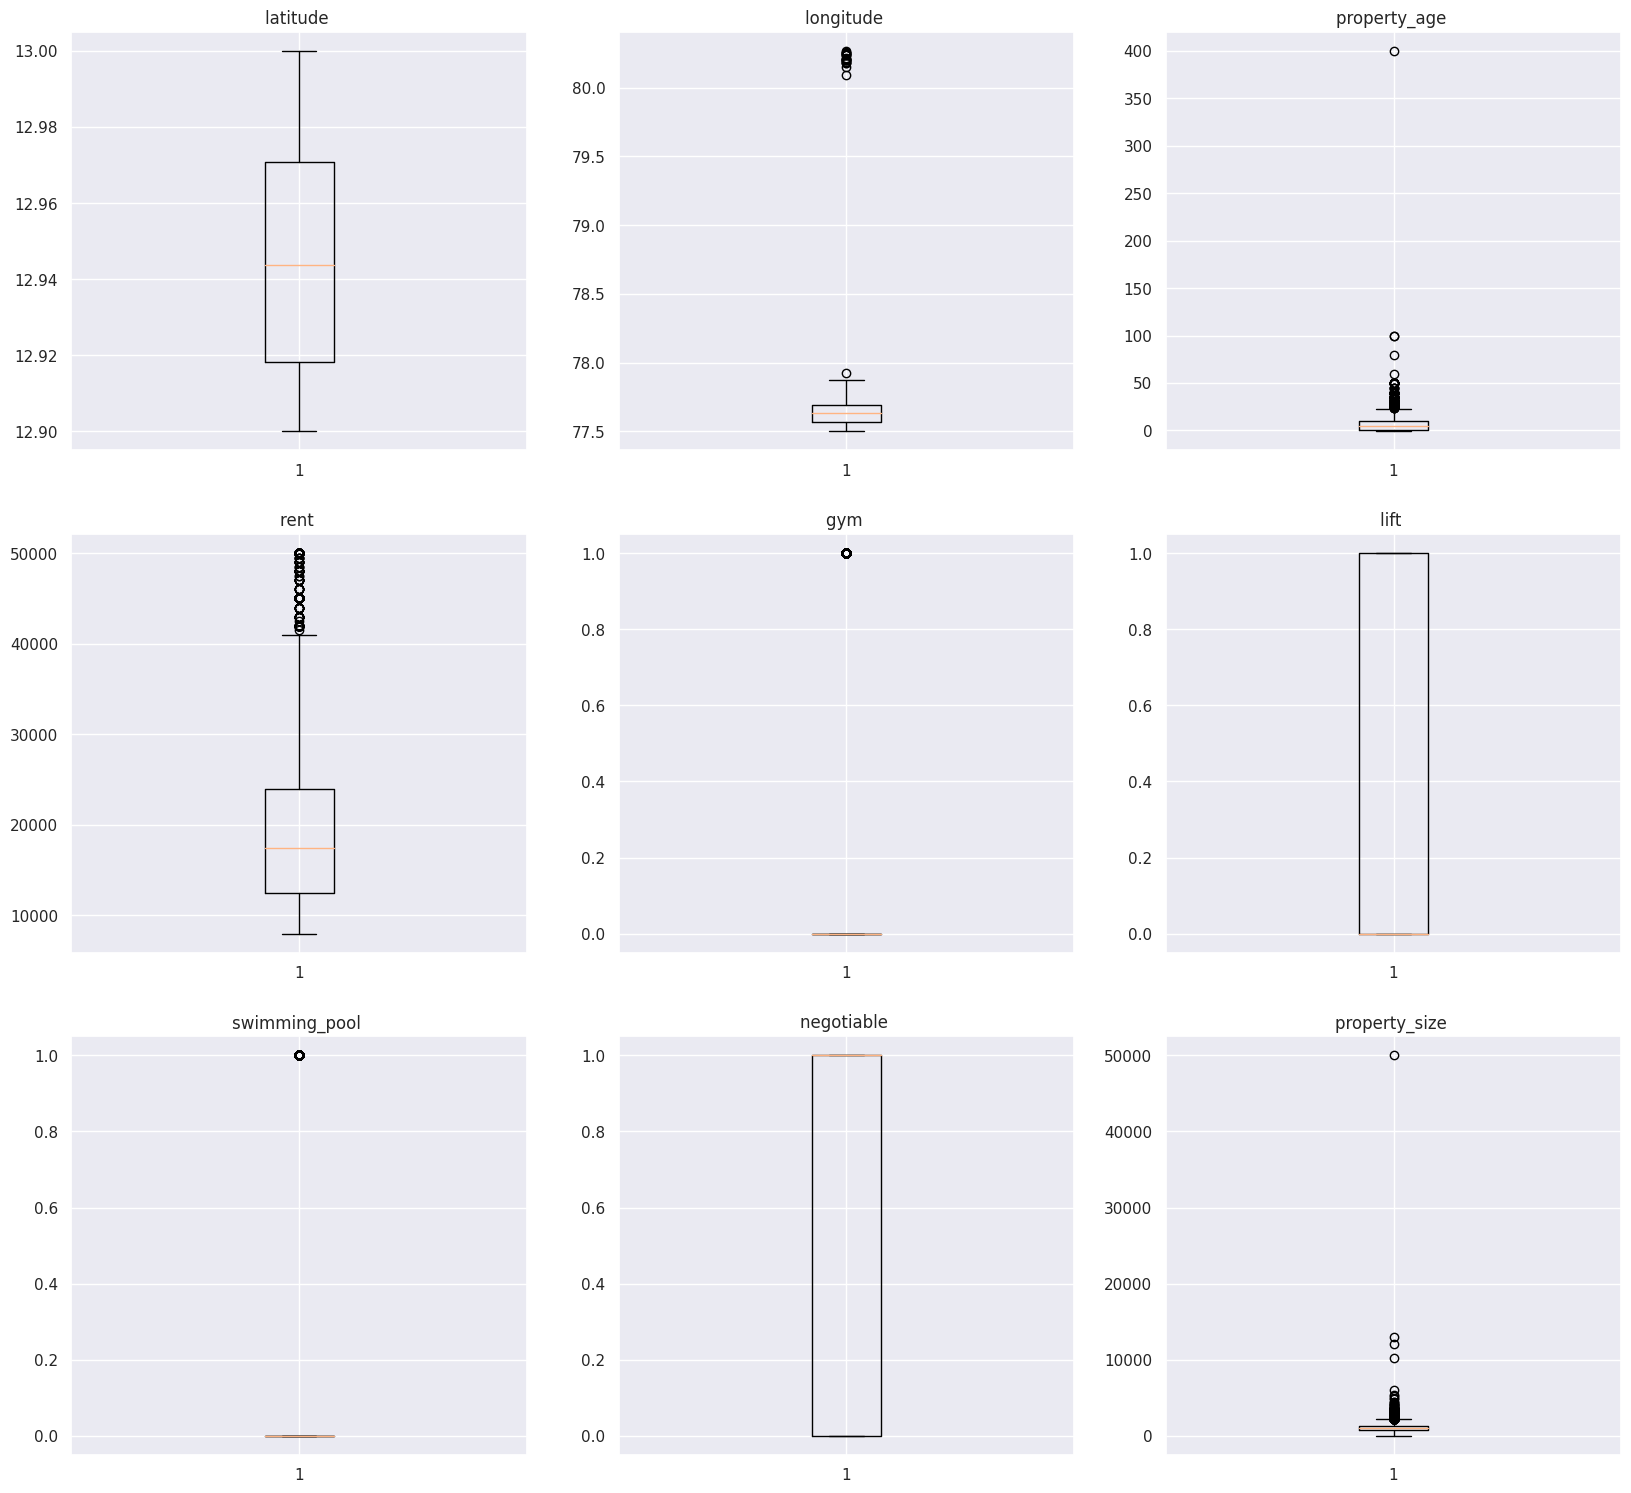

In [34]:
plt.figure(figsize=(20, 25))

plt.subplot(431)
plt.boxplot(df['latitude'] )
plt.title('latitude ')

plt.subplot(432)
plt.boxplot(df['longitude'] )
plt.title('longitude ')

plt.subplot(433)
plt.boxplot(df['property_age'] )
plt.title('property_age ')

plt.subplot(434)
plt.boxplot(df['rent'] )
plt.title('rent ')

plt.subplot(435)
plt.boxplot(df['gym'] )
plt.title('gym ')

plt.subplot(436)
plt.boxplot(df['lift'] )
plt.title('lift ')

plt.subplot(437)
plt.boxplot(df['swimming_pool'] )
plt.title('swimming_pool ')

plt.subplot(438)
plt.boxplot(df['negotiable'] )
plt.title('negotiable ')

plt.subplot(439)
plt.boxplot(df['property_size'] )
plt.title('property_size ')

# show plot
plt.show()

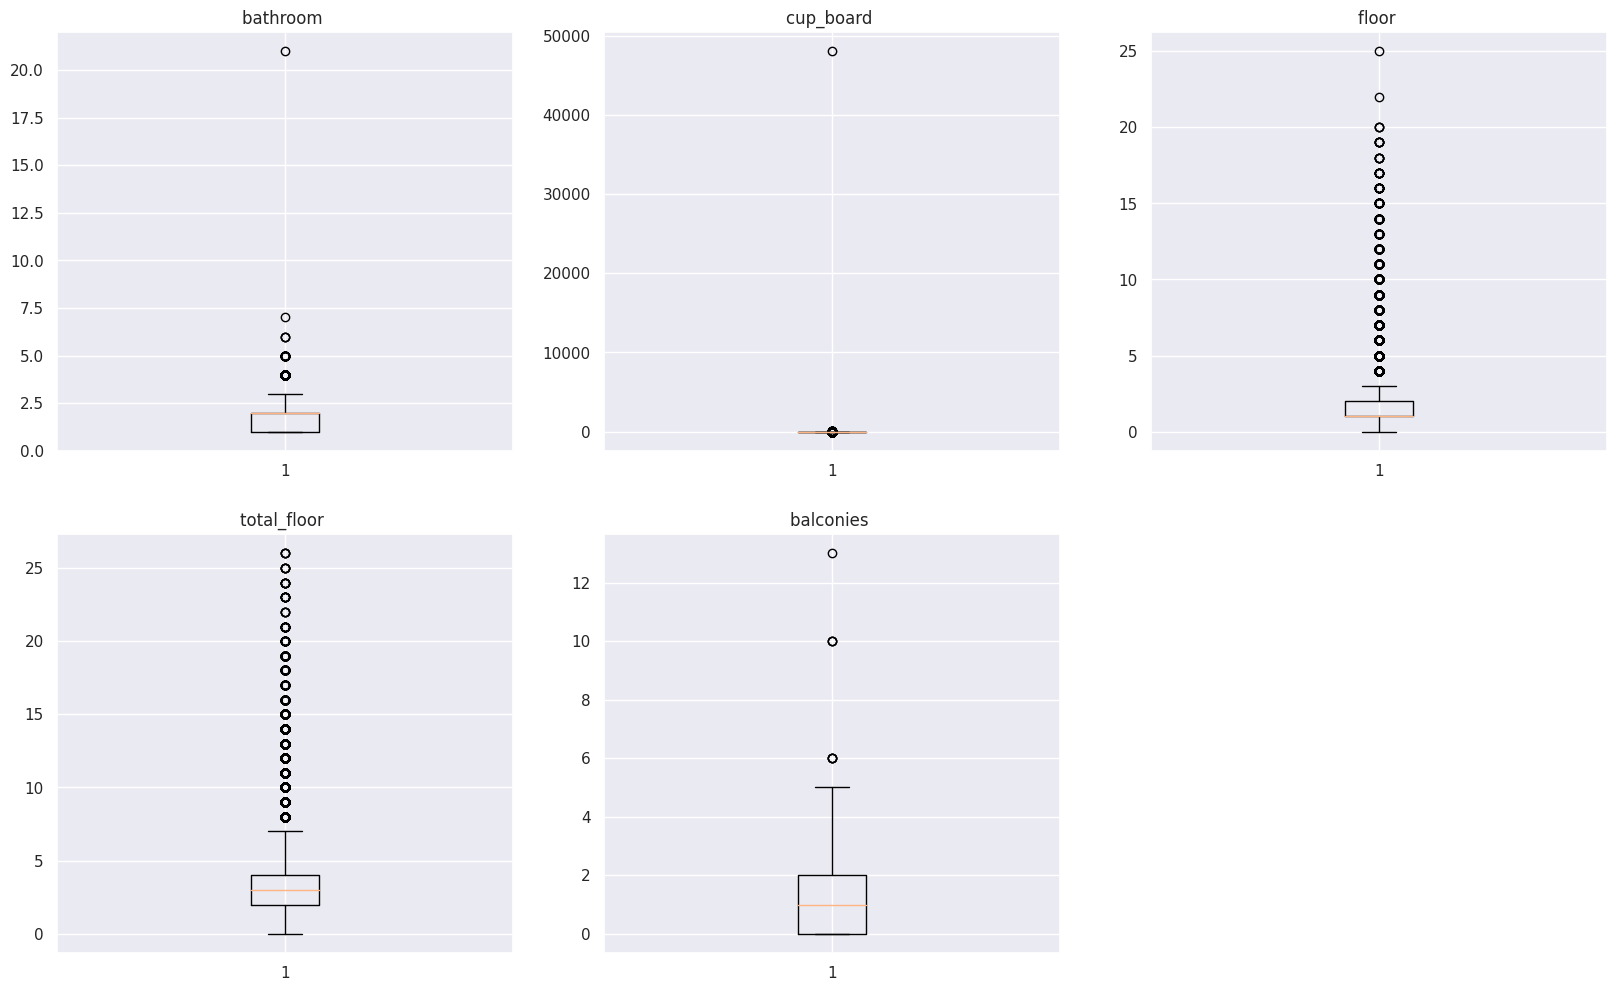

In [35]:
plt.figure(figsize=(20, 25))

plt.subplot(431)
plt.boxplot(df['bathroom'] )
plt.title('bathroom ')

plt.subplot(432)
plt.boxplot(df['cup_board'] )
plt.title('cup_board ')

plt.subplot(433)
plt.boxplot(df['floor'] )
plt.title('floor ')

plt.subplot(434)
plt.boxplot(df['total_floor'] )
plt.title('total_floor ')

plt.subplot(435)
plt.boxplot(df['balconies'] )
plt.title('balconies ')


# show plot
plt.show()

In [36]:
Q1 = df['latitude'].quantile(0.25)
Q3 = df['latitude'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.latitude = df.latitude.clip(lower_bound , upper_bound)

<ipython-input-36-16e591aa426c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.latitude = df.latitude.clip(lower_bound , upper_bound)


In [37]:
Q1 = df['longitude'].quantile(0.25)
Q3 = df['longitude'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.longitude = df.longitude.clip(lower_bound , upper_bound)

<ipython-input-37-8281a27db6df>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.longitude = df.longitude.clip(lower_bound , upper_bound)


In [38]:
Q1 = df['property_age'].quantile(0.25)
Q3 = df['property_age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.property_age = df.property_age.clip(lower_bound , upper_bound)

<ipython-input-38-881e9e72b080>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.property_age = df.property_age.clip(lower_bound , upper_bound)


In [39]:
Q1 = df['rent'].quantile(0.25)
Q3 = df['rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.rent = df.rent.clip(lower_bound , upper_bound)

<ipython-input-39-9440575c3401>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rent = df.rent.clip(lower_bound , upper_bound)


In [41]:
Q1 = df['gym'].quantile(0.25)
Q3 = df['gym'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.gym = df.gym.clip(lower_bound , upper_bound)

<ipython-input-41-df7e9bdbd343>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gym = df.gym.clip(lower_bound , upper_bound)


In [42]:
Q1 = df['lift'].quantile(0.25)
Q3 = df['lift'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.lift = df.lift.clip(lower_bound , upper_bound)

<ipython-input-42-c102d1379588>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lift = df.lift.clip(lower_bound , upper_bound)


In [43]:
Q1 = df['swimming_pool'].quantile(0.25)
Q3 = df['swimming_pool'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.swimming_pool = df.swimming_pool.clip(lower_bound , upper_bound)

<ipython-input-43-7534516d9d71>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.swimming_pool = df.swimming_pool.clip(lower_bound , upper_bound)


In [44]:
Q1 = df['negotiable'].quantile(0.25)
Q3 = df['negotiable'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.negotiable = df.negotiable.clip(lower_bound , upper_bound)

<ipython-input-44-2f4742506858>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.negotiable = df.negotiable.clip(lower_bound , upper_bound)


In [45]:
Q1 = df['property_size'].quantile(0.25)
Q3 = df['property_size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.property_size = df.property_size.clip(lower_bound , upper_bound)

<ipython-input-45-b6893e1ef930>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.property_size = df.property_size.clip(lower_bound , upper_bound)


In [46]:
Q1 = df['bathroom'].quantile(0.25)
Q3 = df['bathroom'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.bathroom = df.bathroom.clip(lower_bound , upper_bound)

<ipython-input-46-3d291092a2e8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bathroom = df.bathroom.clip(lower_bound , upper_bound)


In [48]:
Q1 = df['cup_board'].quantile(0.25)
Q3 = df['cup_board'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.cup_board = df.cup_board.clip(lower_bound , upper_bound)

<ipython-input-48-5f9f76a6fb23>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cup_board = df.cup_board.clip(lower_bound , upper_bound)


In [49]:
Q1 = df['floor'].quantile(0.25)
Q3 = df['floor'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.floor = df.floor.clip(lower_bound , upper_bound)

<ipython-input-49-13c06c28eae8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.floor = df.floor.clip(lower_bound , upper_bound)


In [50]:
Q1 = df['total_floor'].quantile(0.25)
Q3 = df['total_floor'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.total_floor = df.total_floor.clip(lower_bound , upper_bound)

<ipython-input-50-cf5ba6877215>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.total_floor = df.total_floor.clip(lower_bound , upper_bound)


In [51]:
Q1 = df['balconies'].quantile(0.25)
Q3 = df['balconies'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.balconies = df.balconies.clip(lower_bound , upper_bound)

<ipython-input-51-571c5a378e84>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.balconies = df.balconies.clip(lower_bound , upper_bound)


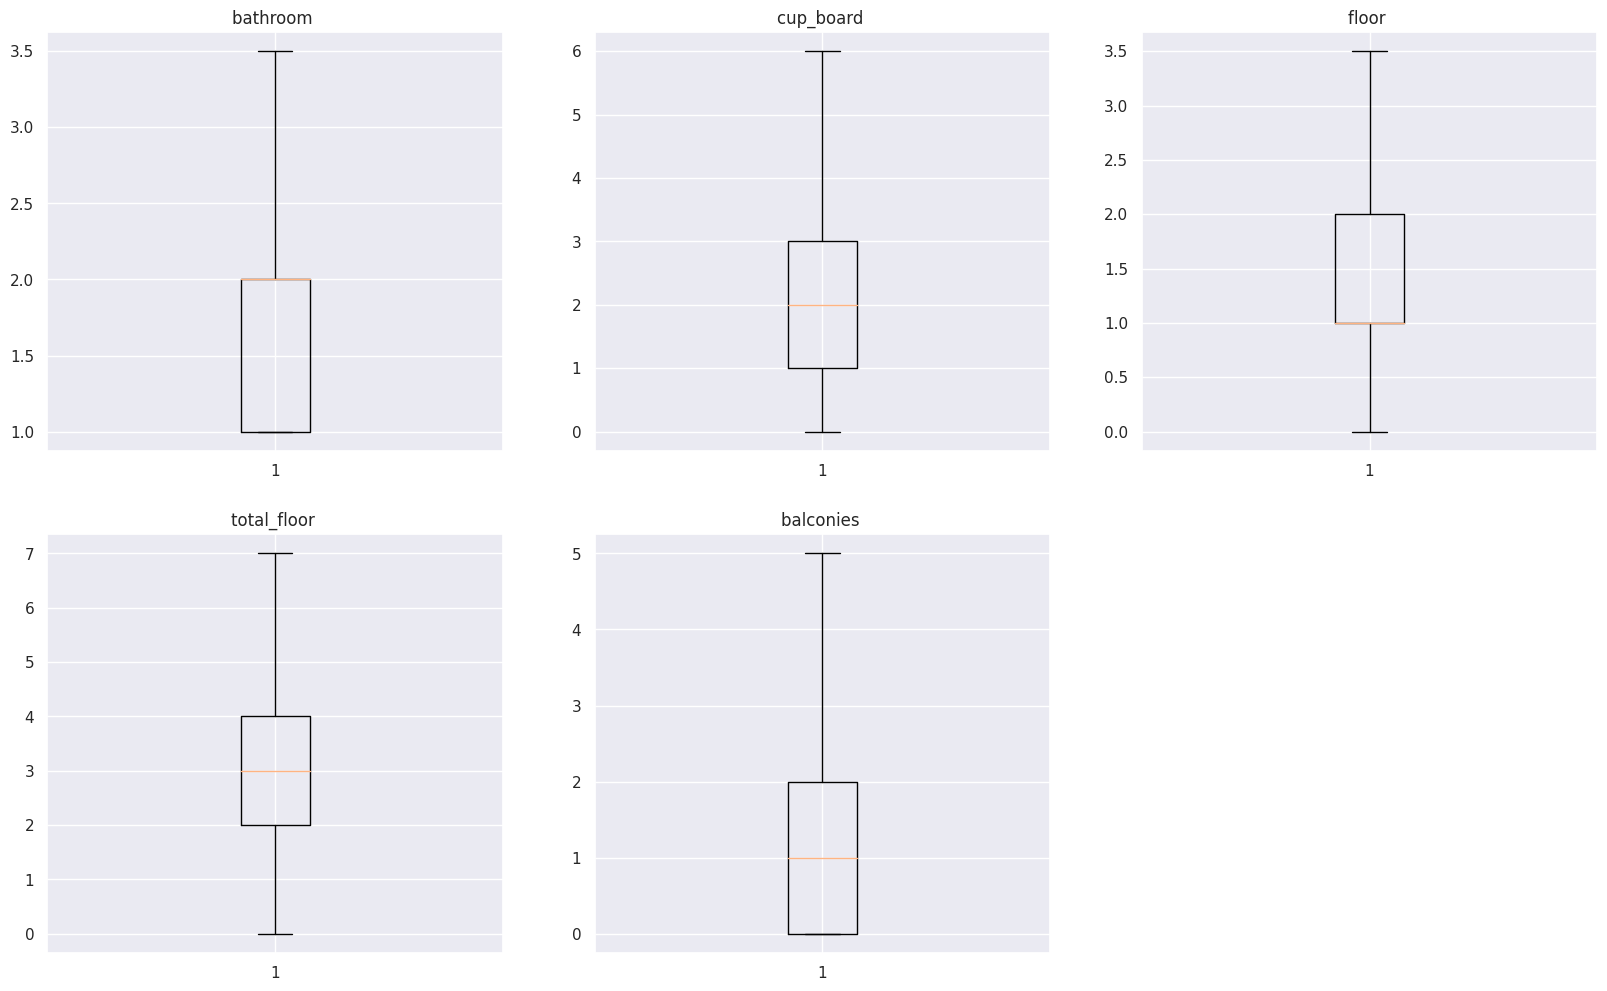

In [52]:

plt.figure(figsize=(20, 25))

plt.subplot(431)
plt.boxplot(df['bathroom'] )
plt.title('bathroom ')

plt.subplot(432)
plt.boxplot(df['cup_board'] )
plt.title('cup_board ')

plt.subplot(433)
plt.boxplot(df['floor'] )
plt.title('floor ')

plt.subplot(434)
plt.boxplot(df['total_floor'] )
plt.title('total_floor ')

plt.subplot(435)
plt.boxplot(df['balconies'] )
plt.title('balconies ')


# show plot
plt.show()

Eda (Exploratary Data Analysis)
Feature Vs Target (Categorical Data )¶

In [53]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['id',
 'type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'amenities',
 'water_supply',
 'building_type']

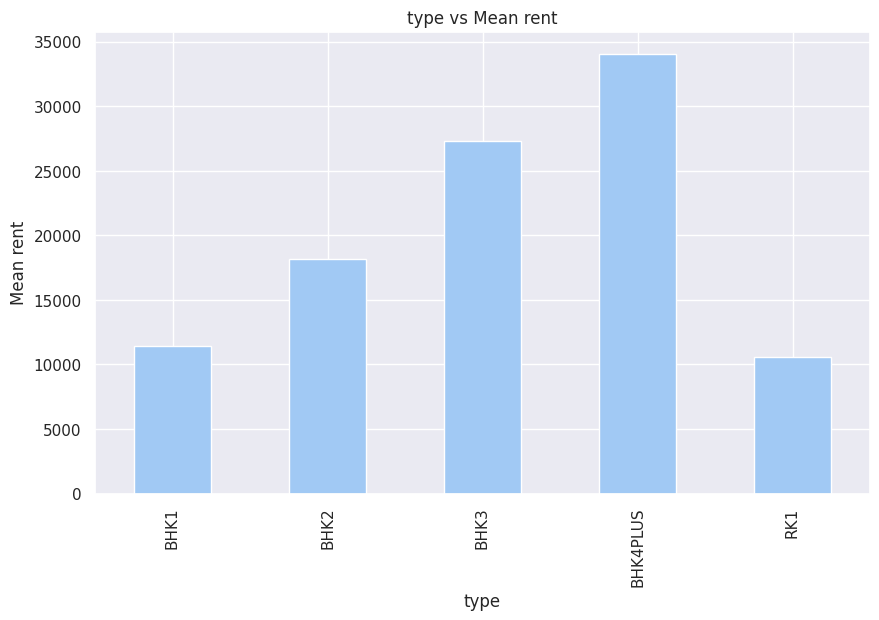

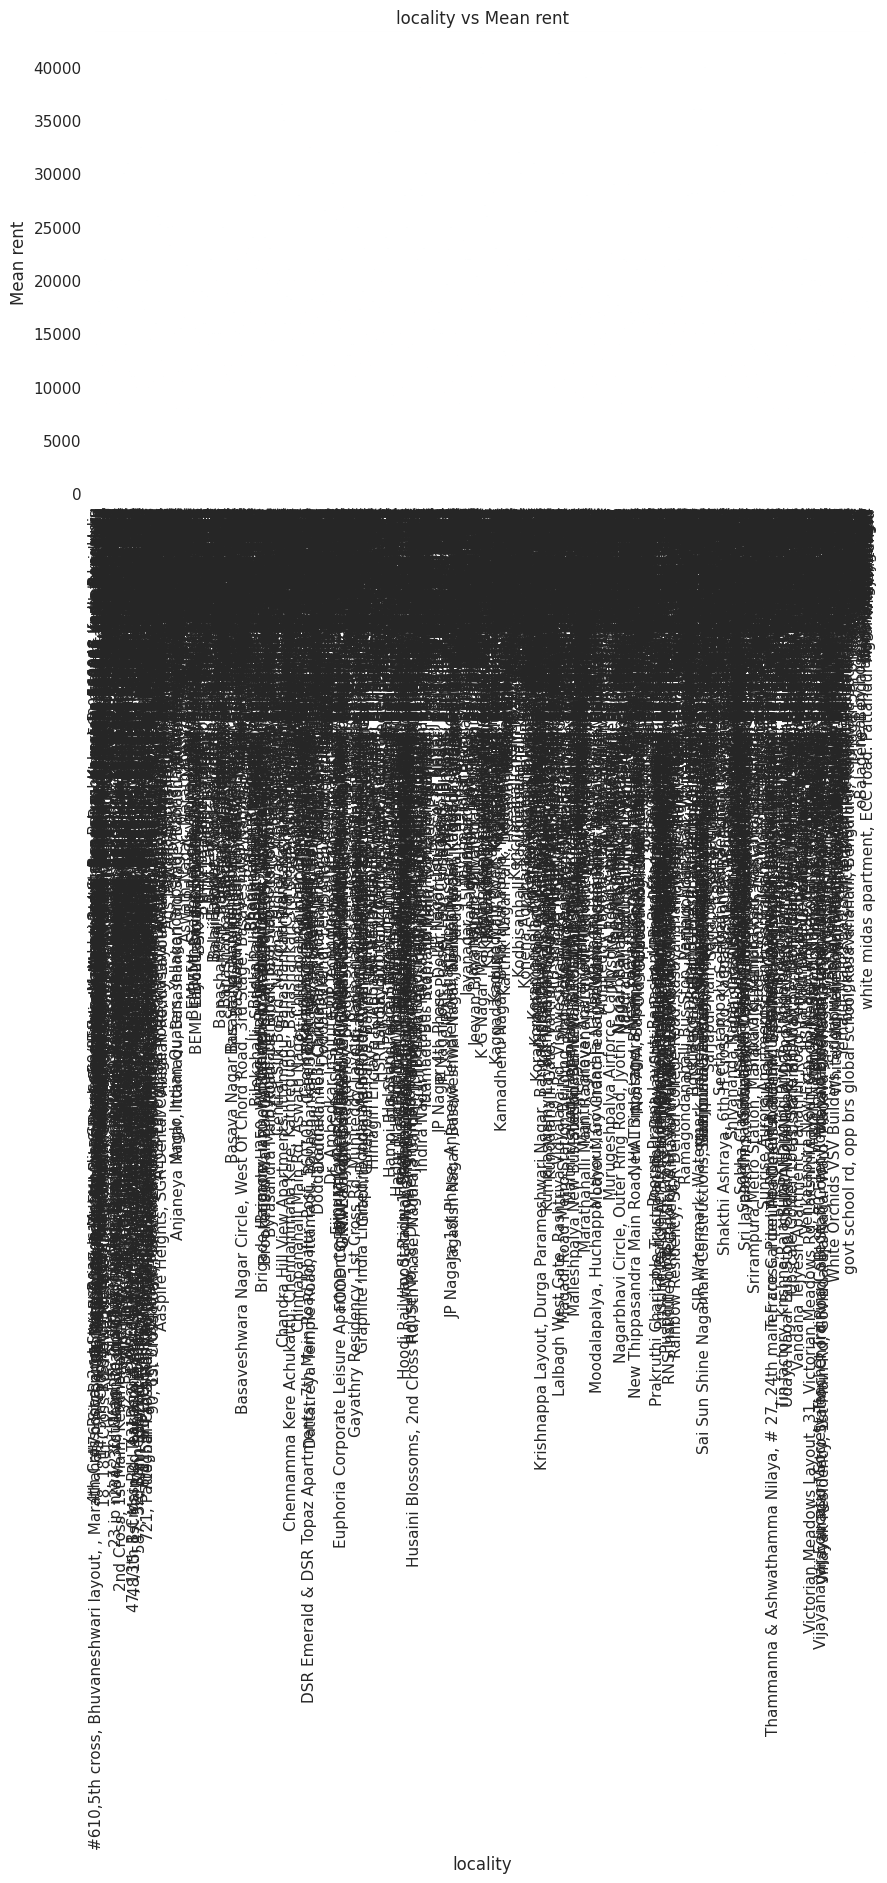

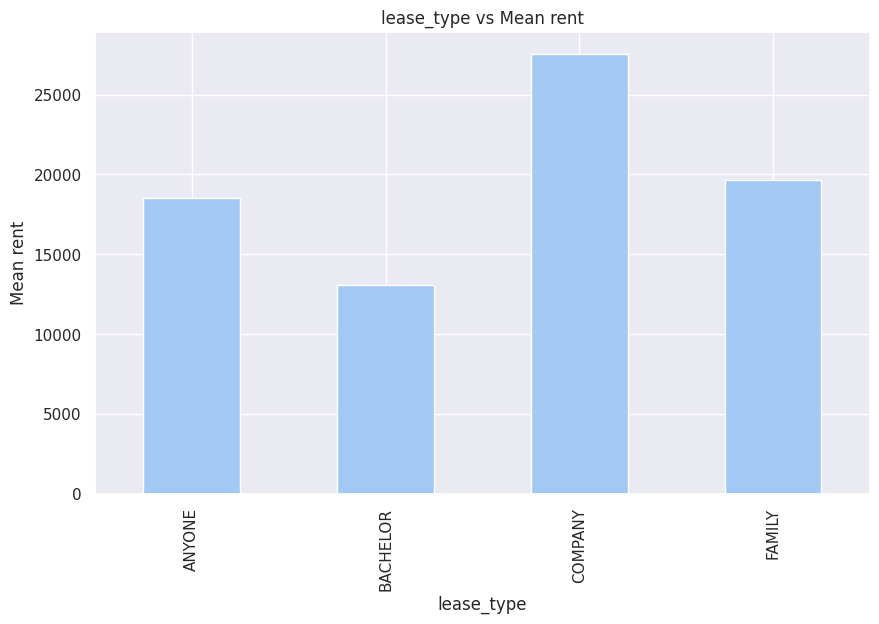

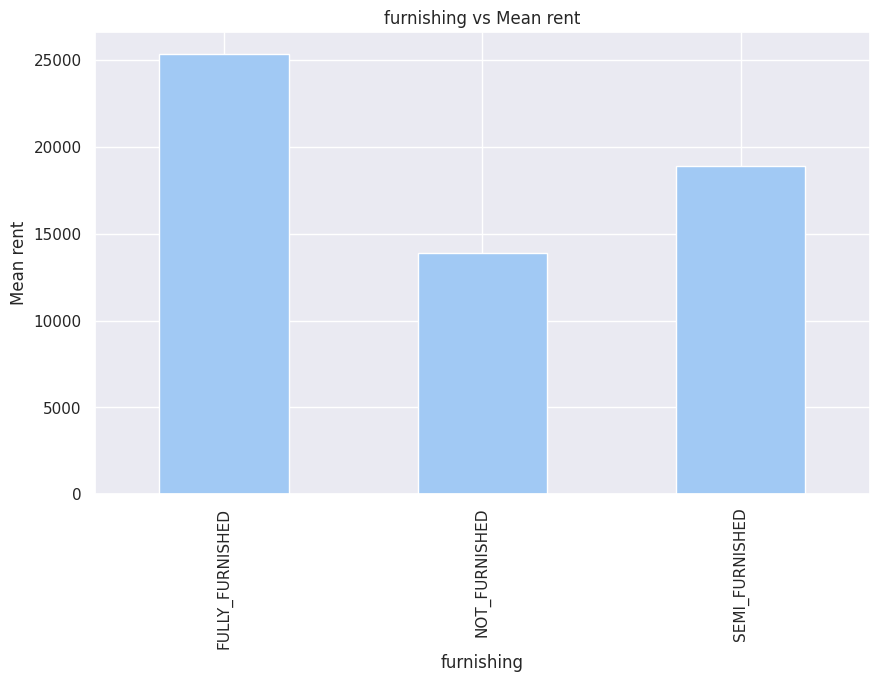

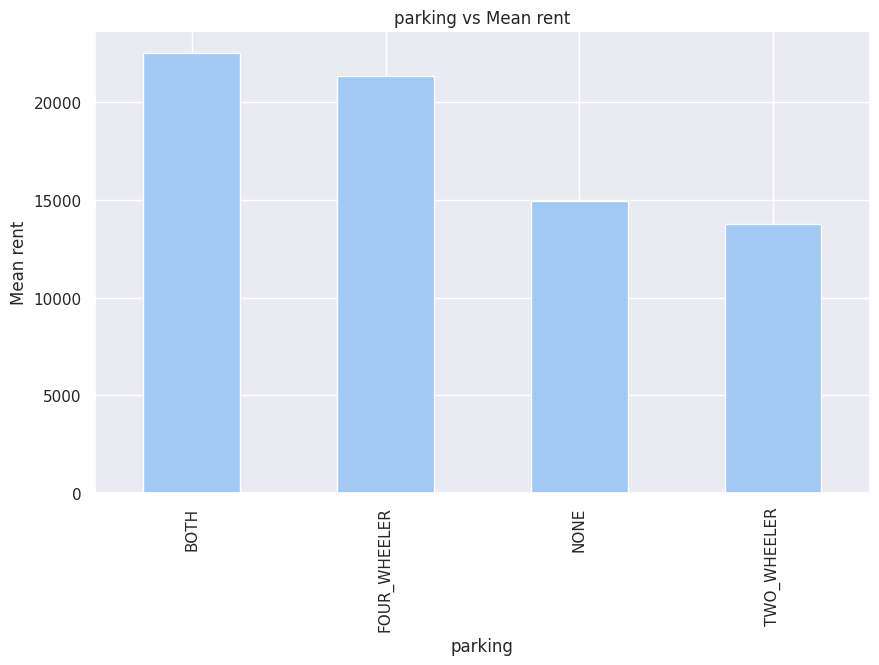

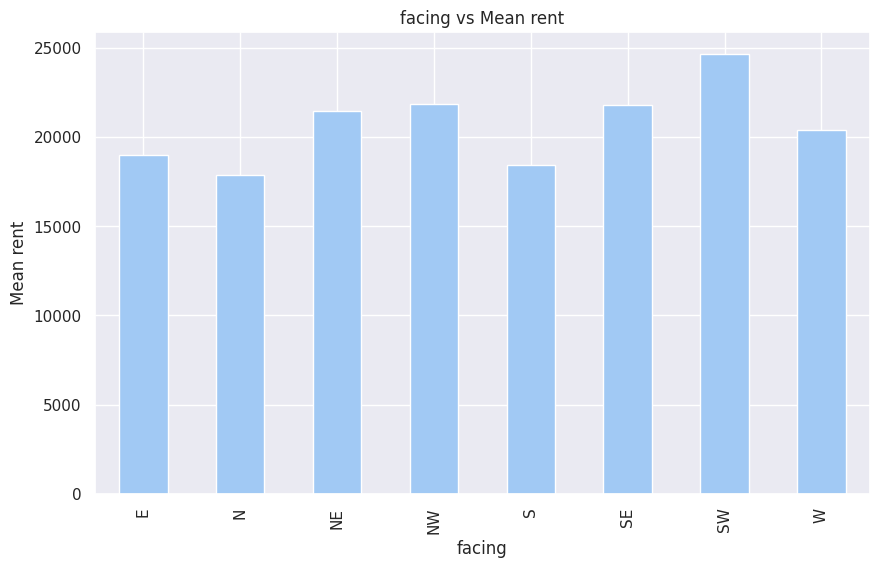

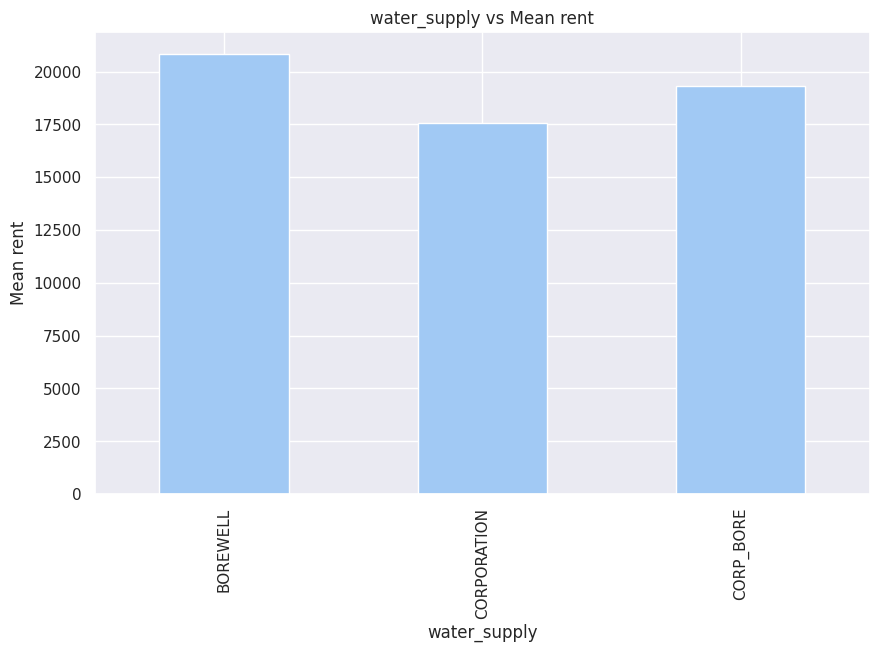

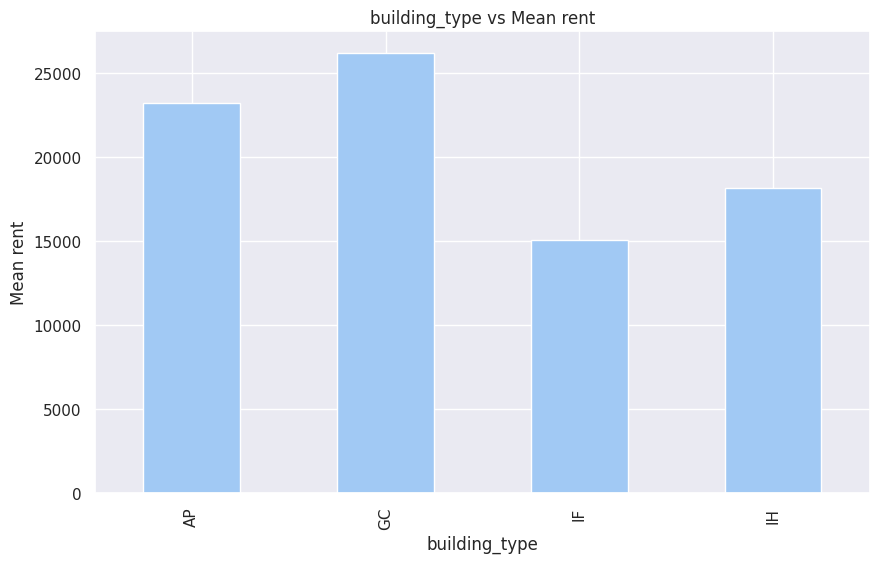

In [54]:
features = [
    'type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['rent'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean rent')
    plt.title(f'{feature} vs Mean rent')
    plt.show()

Feature Vs Target (Condinues Data )

In [55]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['latitude',
 'longitude',
 'property_age',
 'bathroom',
 'cup_board',
 'floor',
 'total_floor',
 'balconies',
 'rent']

In [56]:
int64= [var for var in df.columns if df[var].dtype == 'int64']
int64

['gym', 'lift', 'swimming_pool', 'negotiable', 'property_size']

In [57]:
int32= [var for var in df.columns if df[var].dtype == 'int32']
int32

[]

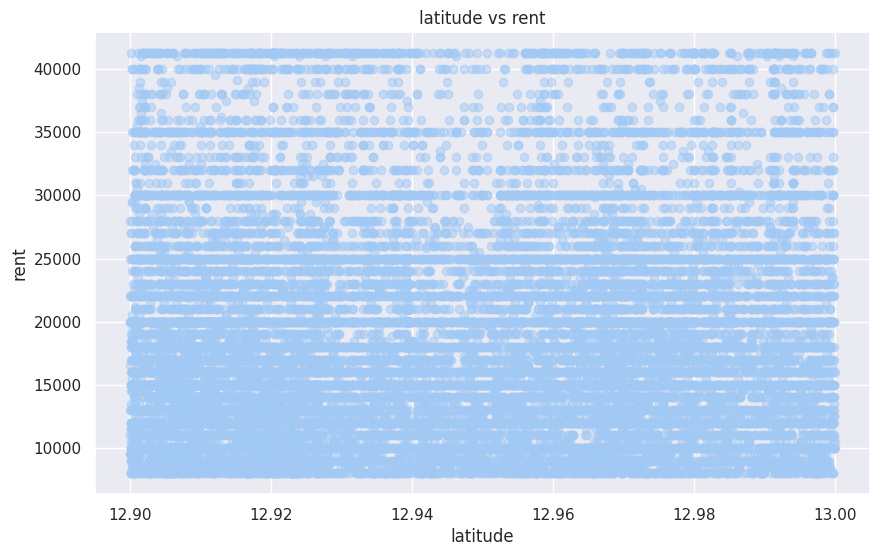

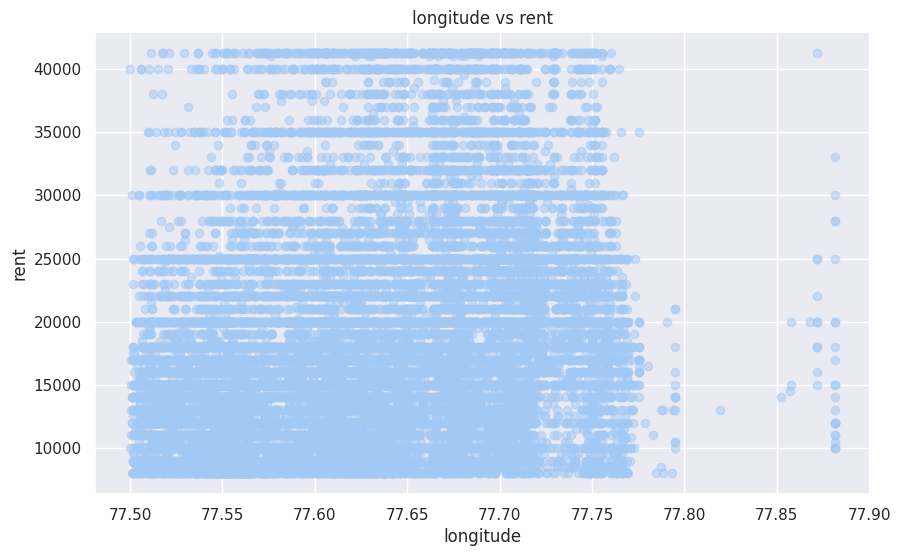

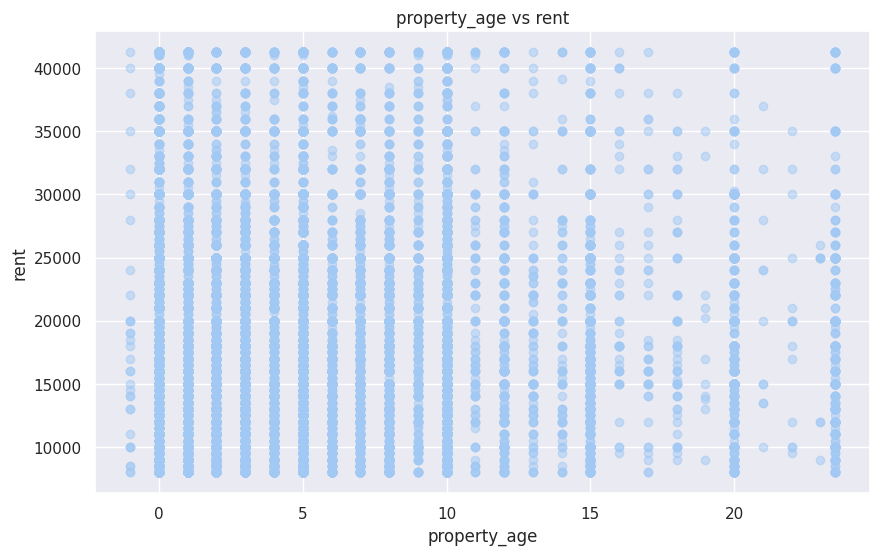

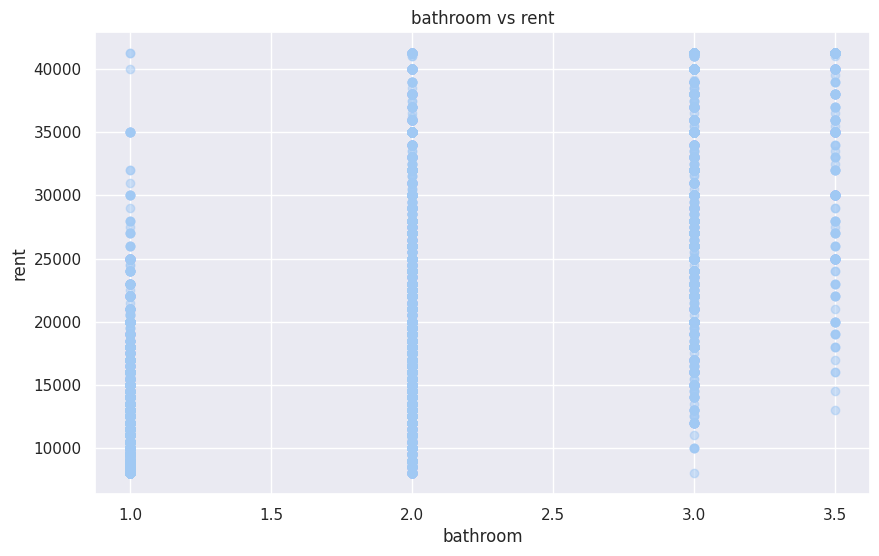

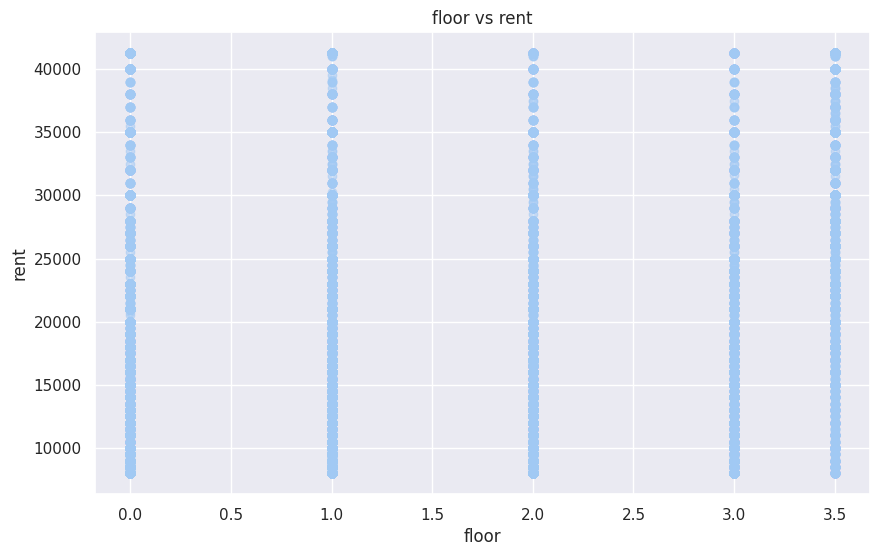

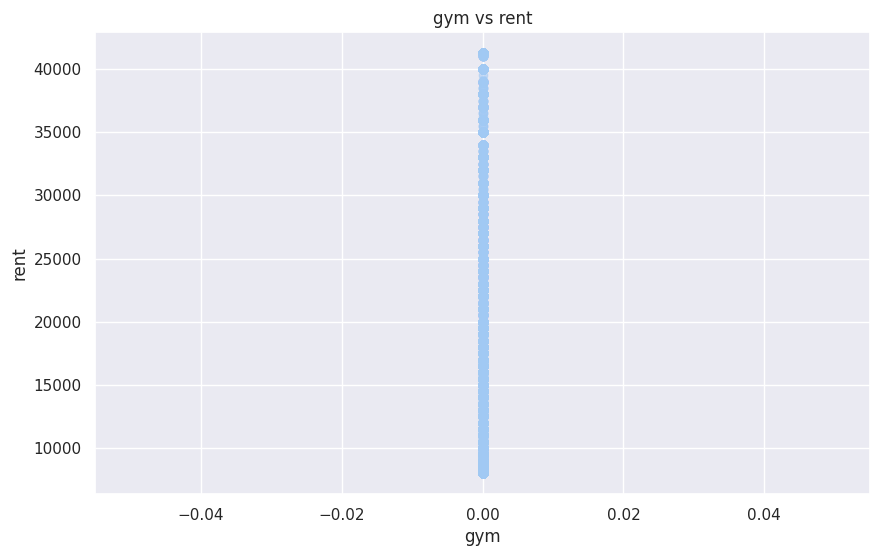

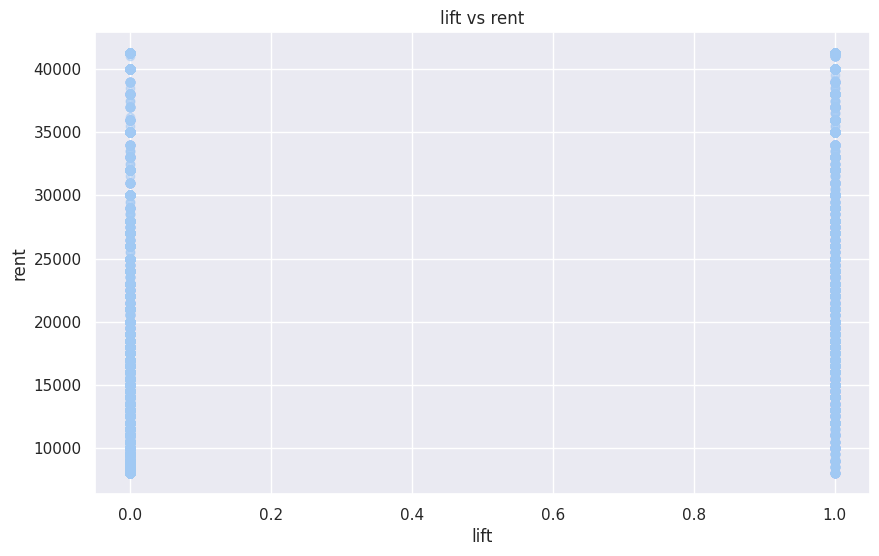

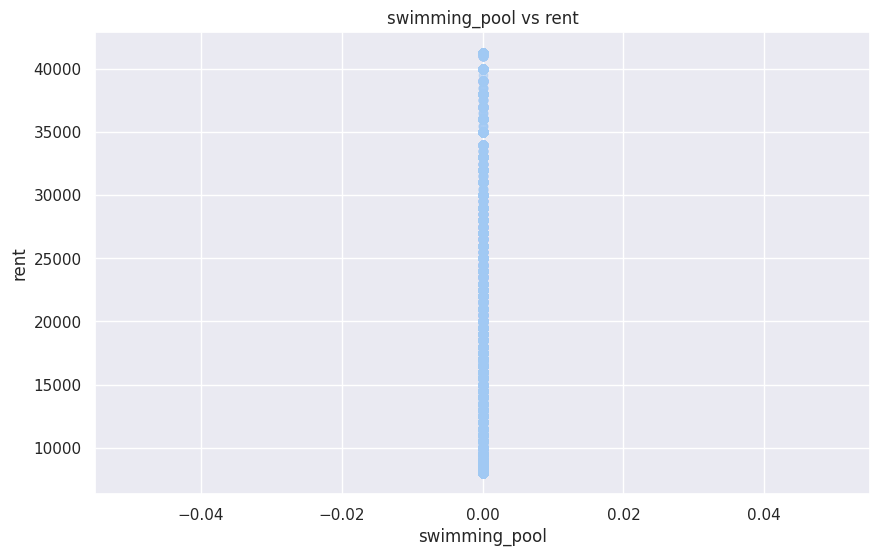

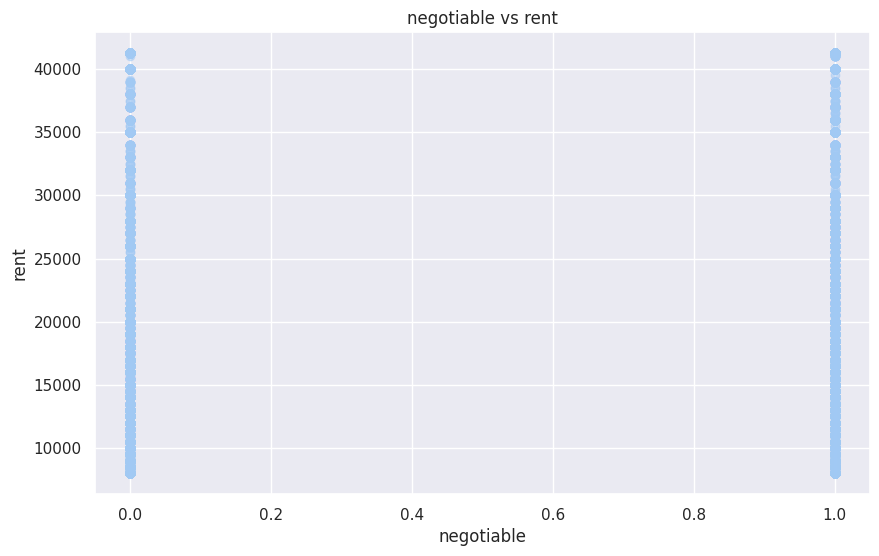

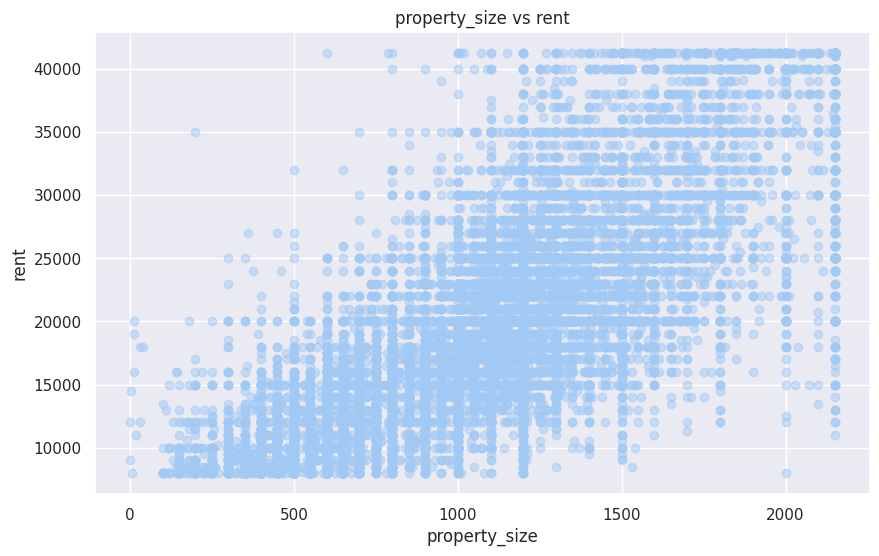

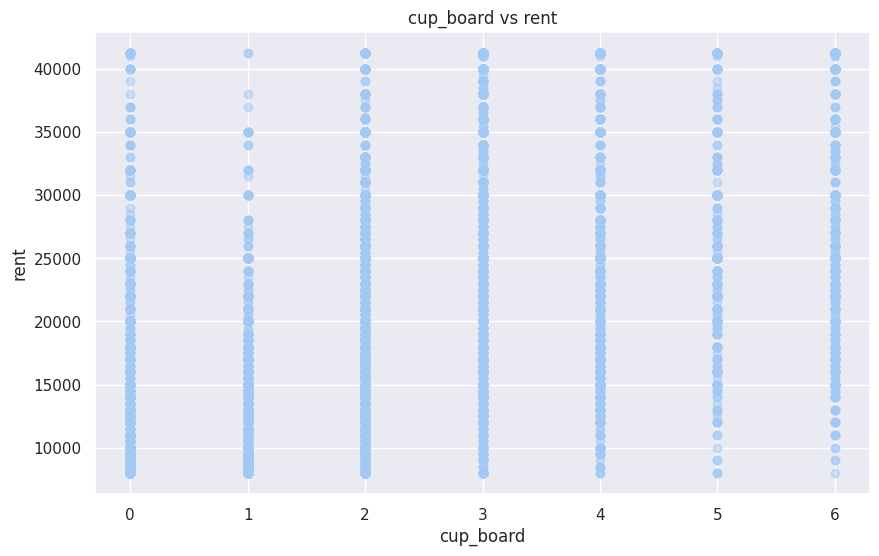

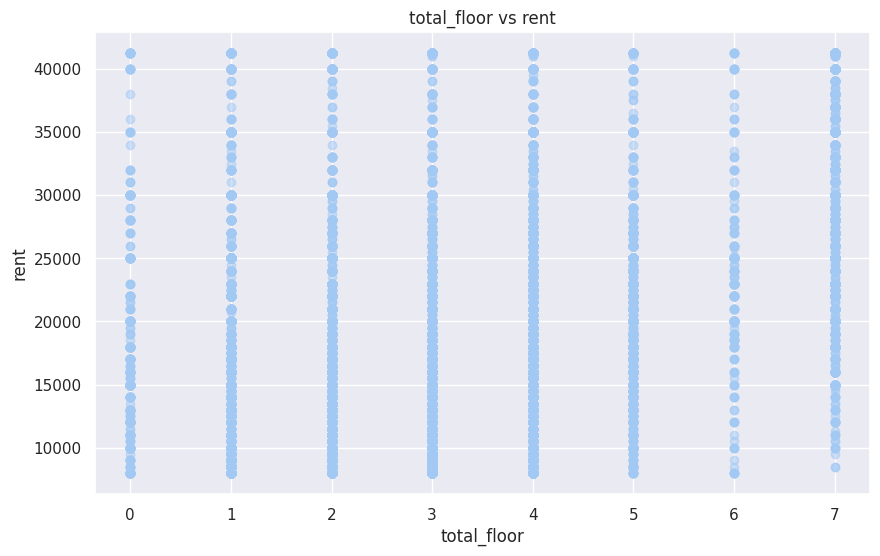

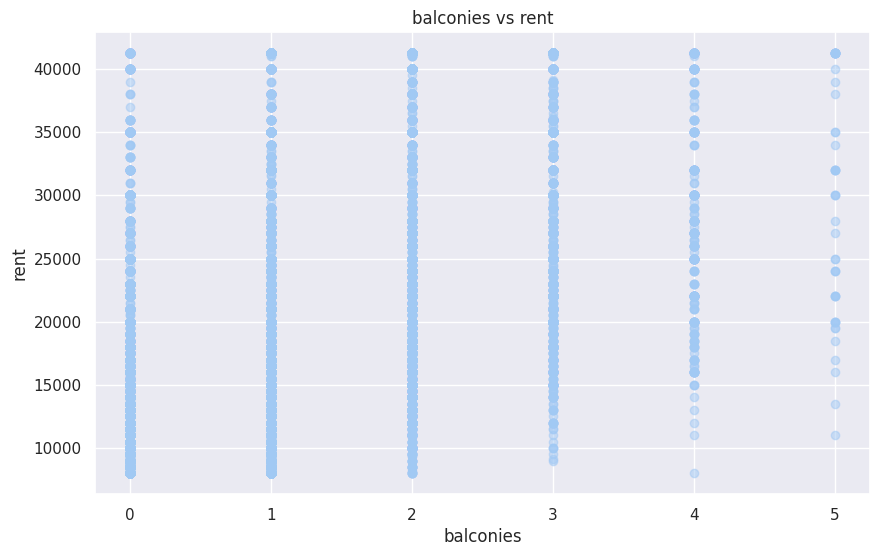

In [58]:
features = ['latitude', 'longitude', 'property_age', 'bathroom', 'floor', 'gym', 'lift', 'swimming_pool', 'negotiable', 'property_size','cup_board', 'total_floor', 'balconies']
target = 'rent'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

In [65]:

del df['id']
del df['activation_date']

Encoding

In [66]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['type',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type']

In [67]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [68]:
ordinal_cols = ['type',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type']
for col in ordinal_cols:
    df1[col] = le.fit_transform(df1[col])
df1.head(2)

type   latitude  longitude  lease_type  gym  lift  swimming_pool  \
1     1  12.929557  77.672280           0    0     1              0   
2     2  12.982870  77.881361           3    0     1              0   

   negotiable  furnishing  parking  ...  property_age  bathroom  facing  \
1           1           2        0  ...           4.0       2.0       2   
2           0           2        0  ...           6.0       3.0       0   

   cup_board  floor  total_floor  water_supply  building_type  balconies  \
1        2.0    3.0          4.0             1              0        2.0   
2        3.0    1.0          5.0             2              0        3.0   

      rent  
1  22000.0  
2  28000.0  

[2 rows x 21 columns]

Split

In [69]:
X = df1.drop('rent',axis=1)
y = df1['rent']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=80)

In [70]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(16301, 20) (4076, 20) (16301,) (4076,)


In [ ]:
scalling

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-0.17717956, -0.24112253, -1.11817903, ...,  0.86340197,
          0.65962833, -0.14699649],
        [-0.17717956,  0.86107149, -1.52281923, ...,  0.86340197,
         -1.10801945,  0.86833819],
        [ 3.49893929,  1.12226511,  0.16614375, ...,  0.86340197,
          0.65962833, -0.14699649],
        ...,
        [ 1.04819339,  0.0333288 ,  1.16683189, ..., -1.87772483,
         -1.10801945,  1.88367287],
        [ 1.04819339,  0.7801056 , -1.4827327 , ..., -0.50716143,
          0.65962833, -1.16233117],
        [ 1.04819339, -0.88414122,  0.04954835, ...,  0.86340197,
         -1.10801945,  0.86833819]]),
 array([[ 1.04819339, -1.34940528, -1.05241225, ..., -0.50716143,
          0.65962833, -0.14699649],
        [ 3.49893929,  0.61286797,  0.16266754, ..., -0.50716143,
          0.65962833, -0.14699649],
        [ 1.04819339,  0.00794674, -0.50610491, ...,  0.86340197,
         -1.10801945,  1.88367287],
        ...,
        [-0.17717956, -1.44990572, -0.84221458, ...,  

Model_fit

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[24114.85962247 10551.49944928 29377.863584   ... 13289.75249389
 16102.90619268  9447.58649573]
19031    25000.0
9301     14000.0
523      41250.0
4678     23000.0
9677     21000.0
          ...   
13443    12000.0
18040    12000.0
12200     8000.0
5184     13000.0
5335     10000.0
Name: rent, Length: 4076, dtype: float64


In [74]:
linear_model.score(X_test, y_test)

0.6833443589511583

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.6761002868170312

K Nearest Neighbor Regression

In [76]:

# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 3389.6324828263005
Mean Squared Error (MSE)     : 20712570.68761531
Root Mean Square Error (RMSE): 4551.106534417241
R-squared (R2) Score         : 0.6894874330595162


Decision Tree Regression¶

In [78]:

# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=20)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 3346.9501302895146
Mean Squared Error (MSE)     : 22363366.52310529
Root Mean Square Error (RMSE): 4728.992125506797
R-squared (R2) Score         : 0.6647395222326313


Random Forest Regression

In [79]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2)

Mean Absolute Error (MAE)    : 2539.416633137062
Mean Squared Error (MSE)     : 12419149.832903596
Root Mean Square Error (RMSE): 3524.0814168948473
R-squared (R2) Score         : 0.8138182772194869


Xg Boost

In [80]:

# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2)

Mean Absolute Error (MAE)    : 2496.9682253013066
Mean Squared Error (MSE)     : 11851930.794505395
Root Mean Square Error (RMSE): 3442.6633286607325
R-squared (R2) Score         : 0.82232174317197


Suggestion

In [81]:

xgregressor.feature_importances_

array([0.04112783, 0.01853105, 0.05758477, 0.01070849, 0.        ,
       0.06337336, 0.        , 0.00996804, 0.05312163, 0.03625784,
       0.3821492 , 0.01062472, 0.15938342, 0.00826256, 0.03408129,
       0.00898146, 0.05153131, 0.00917328, 0.03348853, 0.01165124],
      dtype=float32)

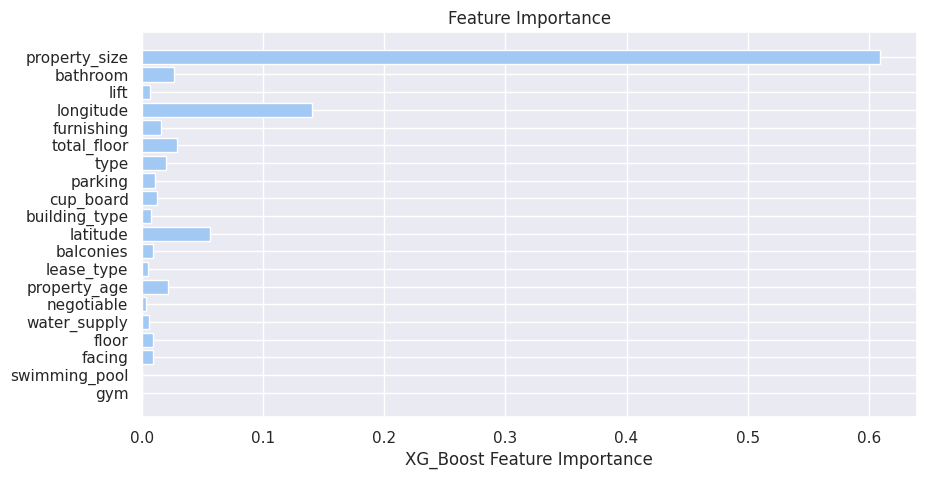

In [82]:
sorted_idx = xgregressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("XG_Boost Feature Importance")
plt.title("Feature Importance")
plt.show()